In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import io
import matplotlib.pyplot as plt

# New Antecedent/Consequent objects hold universe variables and membership
# functions
humedad_suelo = ctrl.Antecedent(np.arange(0, 1024, 1), 'humedad_suelo')
tiempo_riego = ctrl.Consequent(np.arange(-2, 18, 1), 'tiempo_riego')

# Auto-membership function population is possible with .automf(3, 5, or 7)
humedad_suelo['seco'] = fuzz.trimf(humedad_suelo.universe, [0, 100, 200])
humedad_suelo['semi_seco'] = fuzz.trimf(humedad_suelo.universe, [120, 310, 500])
humedad_suelo['humedo'] = fuzz.trimf(humedad_suelo.universe, [450, 572, 694])
humedad_suelo['semi_encharcado'] = fuzz.trimf(humedad_suelo.universe, [658, 725, 792])
humedad_suelo['encharcado'] = fuzz.trimf(humedad_suelo.universe, [750, 887,1024])

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tiempo_riego['nada'] = fuzz.trimf(tiempo_riego.universe, [-2, -1, 0])
tiempo_riego['poco'] = fuzz.trimf(tiempo_riego.universe, [0, 2 , 4])
tiempo_riego['medio'] = fuzz.trimf(tiempo_riego.universe, [3, 6, 9])
tiempo_riego['bastante'] = fuzz.trimf(tiempo_riego.universe, [7, 9, 12])
tiempo_riego['mucho'] = fuzz.trapmf(tiempo_riego.universe, [10, 13, 17, 17])

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


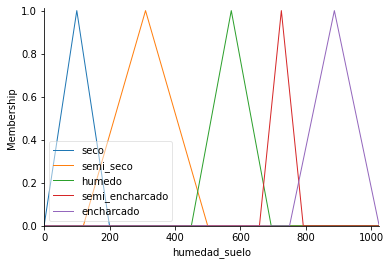

In [2]:
# You can see how these look with .view()
humedad_suelo.view()

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


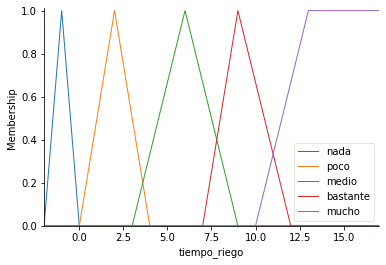

In [3]:
tiempo_riego.view()

IF humedad_suelo[encharcado] THEN tiempo_riego[nada]
	AND aggregation function : fmin
	OR aggregation function  : fmax


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

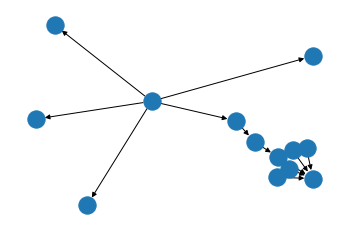

In [4]:
rule1 = ctrl.Rule(humedad_suelo['encharcado'], tiempo_riego['nada'])
rule2 = ctrl.Rule(humedad_suelo['semi_encharcado'], tiempo_riego['poco'])
rule3 = ctrl.Rule(humedad_suelo['humedo'], tiempo_riego['medio'])
rule4 = ctrl.Rule(humedad_suelo['semi_seco'], tiempo_riego['bastante'])
rule5 = ctrl.Rule(humedad_suelo['seco'], tiempo_riego['mucho'])

print(rule1)

rule1.view()

## Control System Creation and Simulation.

Now that we have our rules defined, we can simply create a control system via:

In [5]:
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])

In order to simulate this control system, we will create a ControlSystemSimulation.
Think of this object representing our controller applied to a specific set of cirucmstances. 
For tipping, this might be tipping Sharon at the local brew-pub. 
We would create another ControlSystemSimulation when we’re trying to apply our tipping_ctrl for Travis at the cafe because the inputs would be different.

In [6]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

We can now simulate our control system by simply specifying the inputs and calling the compute method. Suppose we rated the quality 6.5 out of 10 and the service 9.8 of 10.

In [7]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['humedad_suelo'] = 80

# Crunch the numbers
tipping.compute()

Once computed, we can view the result as well as visualize it.

14.058620689655173


/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


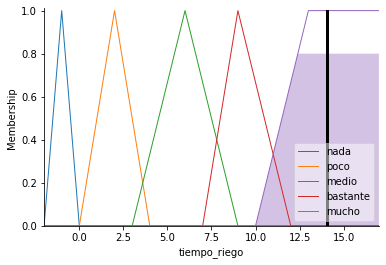

In [8]:
print (tipping.output['tiempo_riego'])
tiempo_riego.view(sim=tipping)

In [9]:
from gestion_riego.models import HistorialRiego

Fecha de Registro:  2021-04-01 17:00:37.459047
Humedad de Suelo:  329.15 Tiempo de Riego:  9.336409464373343
Fecha de Registro:  2021-04-01 12:00:38.076134
Humedad de Suelo:  308.56 Tiempo de Riego:  9.333352336126568
Fecha de Registro:  2021-04-01 08:00:37.504358
Humedad de Suelo:  312.78 Tiempo de Riego:  9.333403665299778
Fecha de Registro:  2021-03-31 17:00:36.984413
Humedad de Suelo:  311.40 Tiempo de Riego:  9.333351298832241
Fecha de Registro:  2021-03-31 12:00:37.773937
Humedad de Suelo:  370.44 Tiempo de Riego:  9.358923337732609
Fecha de Registro:  2021-03-31 08:00:37.465545
Humedad de Suelo:  400.38 Tiempo de Riego:  9.384445322951434
Fecha de Registro:  2021-03-30 17:00:37.101576
Humedad de Suelo:  423.55 Tiempo de Riego:  9.407852704979382
Fecha de Registro:  2021-03-30 12:00:37.720336
Humedad de Suelo:  425.83 Tiempo de Riego:  9.410297252056669
Fecha de Registro:  2021-03-30 08:00:37.727618
Humedad de Suelo:  332.85 Tiempo de Riego:  9.337636854056683
Fecha de Registro: 

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2021-03-29 08:00:37.698139
Humedad de Suelo:  413.60 Tiempo de Riego:  9.397467374157463
Fecha de Registro:  2021-03-28 17:00:38.082182
Humedad de Suelo:  424.00 Tiempo de Riego:  9.408333333333333
Fecha de Registro:  2021-03-28 12:00:37.875029
Humedad de Suelo:  423.69 Tiempo de Riego:  9.408002135718961
Fecha de Registro:  2021-03-28 08:00:37.700351
Humedad de Suelo:  426.75 Tiempo de Riego:  9.411290195742003
Fecha de Registro:  2021-03-27 17:00:37.582525
Humedad de Suelo:  430.40 Tiempo de Riego:  9.415265870862722
Fecha de Registro:  2021-03-27 12:00:37.485652
Humedad de Suelo:  430.44 Tiempo de Riego:  9.415309756158207
Fecha de Registro:  2021-03-27 08:00:37.496560
Humedad de Suelo:  431.95 Tiempo de Riego:  9.41697135730816
Fecha de Registro:  2021-03-26 17:00:37.454448
Humedad de Suelo:  434.05 Tiempo de Riego:  9.419297980263506
Fecha de Registro:  2021-03-26 12:00:37.660350
Humedad de Suelo:  431.44 Tiempo de Riego:  9.416409083329953


/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2021-03-26 08:00:37.575940
Humedad de Suelo:  435.18 Tiempo de Riego:  9.420557411359479
Fecha de Registro:  2021-03-25 17:00:37.525195
Humedad de Suelo:  438.35 Tiempo de Riego:  9.424117902341841
Fecha de Registro:  2021-03-25 12:00:37.601256
Humedad de Suelo:  436.88 Tiempo de Riego:  9.422461845094936
Fecha de Registro:  2021-03-25 08:00:37.408904
Humedad de Suelo:  440.47 Tiempo de Riego:  9.426521139729532
Fecha de Registro:  2021-03-24 17:00:37.153471
Humedad de Suelo:  444.35 Tiempo de Riego:  9.430964073896783
Fecha de Registro:  2021-03-24 12:00:38.000809
Humedad de Suelo:  445.00 Tiempo de Riego:  9.431713900134952
Fecha de Registro:  2021-03-24 08:00:37.495005
Humedad de Suelo:  450.68 Tiempo de Riego:  9.349937302867286
Fecha de Registro:  2021-03-23 17:00:37.365076
Humedad de Suelo:  447.35 Tiempo de Riego:  9.434437749712602
Fecha de Registro:  2021-03-23 12:00:37.406869
Humedad de Suelo:  445.75 Tiempo de Riego:  9.432581020856054
Fecha de Registro: 

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2021-03-22 17:00:37.867309
Humedad de Suelo:  394.20 Tiempo de Riego:  9.378694255697594
Fecha de Registro:  2021-03-22 12:00:37.291696
Humedad de Suelo:  430.94 Tiempo de Riego:  9.41585889306788
Fecha de Registro:  2021-03-22 08:00:37.336854
Humedad de Suelo:  433.50 Tiempo de Riego:  9.418686868686867
Fecha de Registro:  2021-03-21 17:00:37.412832
Humedad de Suelo:  436.60 Tiempo de Riego:  9.422147377287185
Fecha de Registro:  2021-03-21 12:00:37.053568
Humedad de Suelo:  434.25 Tiempo de Riego:  9.419520509707043
Fecha de Registro:  2021-03-21 08:00:37.244479
Humedad de Suelo:  439.05 Tiempo de Riego:  9.424909490070572
Fecha de Registro:  2021-03-20 17:00:37.697277
Humedad de Suelo:  415.95 Tiempo de Riego:  9.399877305614094
Fecha de Registro:  2021-03-20 12:00:37.342520
Humedad de Suelo:  445.00 Tiempo de Riego:  9.431713900134952
Fecha de Registro:  2021-03-20 08:00:37.105062
Humedad de Suelo:  444.39 Tiempo de Riego:  9.431010171858327
Fecha de Registro:  

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2021-03-19 12:00:37.207971
Humedad de Suelo:  446.19 Tiempo de Riego:  9.43309069194953
Fecha de Registro:  2021-03-19 08:00:37.226660
Humedad de Suelo:  448.70 Tiempo de Riego:  9.436011560693641
Fecha de Registro:  2021-03-18 17:00:37.370083
Humedad de Suelo:  449.15 Tiempo de Riego:  9.436537612830497
Fecha de Registro:  2021-03-18 12:00:37.287404
Humedad de Suelo:  445.88 Tiempo de Riego:  9.43273153178761
Fecha de Registro:  2021-03-18 08:00:37.470796
Humedad de Suelo:  451.90 Tiempo de Riego:  9.198021055471573
Fecha de Registro:  2021-03-17 17:00:38.015120
Humedad de Suelo:  454.62 Tiempo de Riego:  8.88108721743196
Fecha de Registro:  2021-03-17 08:00:37.358597
Humedad de Suelo:  509.38 Tiempo de Riego:  6.000000000000002
Fecha de Registro:  2021-03-16 17:00:37.585033
Humedad de Suelo:  442.45 Tiempo de Riego:  9.428781301602585


/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2021-03-16 12:00:37.360674
Humedad de Suelo:  431.50 Tiempo de Riego:  9.41647517670581
Fecha de Registro:  2021-03-16 08:00:37.446628
Humedad de Suelo:  443.75 Tiempo de Riego:  9.430273318431214
Fecha de Registro:  2021-03-15 17:00:37.553747
Humedad de Suelo:  461.60 Tiempo de Riego:  8.175634506346045
Fecha de Registro:  2021-03-15 12:00:37.398777
Humedad de Suelo:  461.25 Tiempo de Riego:  8.208028664334824
Fecha de Registro:  2021-03-15 08:00:37.592633
Humedad de Suelo:  459.23 Tiempo de Riego:  8.400497453097184
Fecha de Registro:  2021-03-14 17:00:37.791014
Humedad de Suelo:  482.90 Tiempo de Riego:  6.733474356755317
Fecha de Registro:  2021-03-14 12:00:37.516001
Humedad de Suelo:  489.25 Tiempo de Riego:  6.44612629274056
Fecha de Registro:  2021-03-14 08:00:37.722745
Humedad de Suelo:  479.42 Tiempo de Riego:  6.905935096881682
Fecha de Registro:  2021-03-13 17:00:37.578628
Humedad de Suelo:  492.10 Tiempo de Riego:  6.323946416892794
Fecha de Registro:  2

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2021-03-13 08:00:37.337223
Humedad de Suelo:  509.10 Tiempo de Riego:  6.0
Fecha de Registro:  2021-03-12 17:00:37.258940
Humedad de Suelo:  459.10 Tiempo de Riego:  8.413224358262509
Fecha de Registro:  2021-03-12 12:00:37.324354
Humedad de Suelo:  422.12 Tiempo de Riego:  9.406331482087982
Fecha de Registro:  2021-03-12 08:00:36.960234
Humedad de Suelo:  429.83 Tiempo de Riego:  9.414641242990639
Fecha de Registro:  2021-03-11 17:00:37.345955
Humedad de Suelo:  437.70 Tiempo de Riego:  9.423384578853492
Fecha de Registro:  2021-03-11 12:00:37.310615
Humedad de Suelo:  437.62 Tiempo de Riego:  9.423294438792025
Fecha de Registro:  2021-03-11 08:00:37.411254
Humedad de Suelo:  437.63 Tiempo de Riego:  9.423305704916512
Fecha de Registro:  2021-03-10 17:00:37.207173
Humedad de Suelo:  437.35 Tiempo de Riego:  9.422990402980824
Fecha de Registro:  2021-03-10 12:00:37.487712
Humedad de Suelo:  432.44 Tiempo de Riego:  9.417512603683065
Fecha de Registro:  2021-03-10 08

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2021-03-09 12:00:37.510974
Humedad de Suelo:  395.62 Tiempo de Riego:  9.379995495959987
Fecha de Registro:  2021-03-09 08:00:37.431900
Humedad de Suelo:  501.67 Tiempo de Riego:  6.0
Fecha de Registro:  2021-03-08 17:00:37.430658
Humedad de Suelo:  429.05 Tiempo de Riego:  9.413788732874089
Fecha de Registro:  2021-03-08 12:00:37.553098
Humedad de Suelo:  427.38 Tiempo de Riego:  9.411972290998168
Fecha de Registro:  2021-03-08 08:00:37.937260
Humedad de Suelo:  426.87 Tiempo de Riego:  9.411419984689788
Fecha de Registro:  2021-03-07 17:00:37.640655
Humedad de Suelo:  429.85 Tiempo de Riego:  9.414663136378948
Fecha de Registro:  2021-03-07 12:00:37.365301
Humedad de Suelo:  427.44 Tiempo de Riego:  9.412037342901883
Fecha de Registro:  2021-03-07 08:00:37.780999
Humedad de Suelo:  428.65 Tiempo de Riego:  9.413352559675554
Fecha de Registro:  2021-03-06 17:00:37.461116
Humedad de Suelo:  433.10 Tiempo de Riego:  9.418243204626064


/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2021-03-06 12:00:37.624326
Humedad de Suelo:  432.50 Tiempo de Riego:  9.417578947368423
Fecha de Registro:  2021-03-06 08:00:37.699739
Humedad de Suelo:  435.88 Tiempo de Riego:  9.421340184702608
Fecha de Registro:  2021-03-05 17:00:37.573639
Humedad de Suelo:  442.10 Tiempo de Riego:  9.428380692494976
Fecha de Registro:  2021-03-05 12:00:37.639834
Humedad de Suelo:  436.56 Tiempo de Riego:  9.422102478840518
Fecha de Registro:  2021-03-05 08:00:38.298079
Humedad de Suelo:  439.15 Tiempo de Riego:  9.42502273033359
Fecha de Registro:  2021-03-04 17:00:39.015583
Humedad de Suelo:  443.45 Tiempo de Riego:  9.429928444158778
Fecha de Registro:  2021-03-04 12:00:37.945561
Humedad de Suelo:  427.19 Tiempo de Riego:  9.411766396932466
Fecha de Registro:  2021-03-04 08:00:37.866912
Humedad de Suelo:  427.35 Tiempo de Riego:  9.41193977093376
Fecha de Registro:  2021-03-03 17:00:38.047147
Humedad de Suelo:  430.70 Tiempo de Riego:  9.415595175579762
Fecha de Registro:  2

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2021-03-03 08:00:38.742447
Humedad de Suelo:  436.75 Tiempo de Riego:  9.422315803320457
Fecha de Registro:  2021-03-02 17:00:39.385023
Humedad de Suelo:  440.62 Tiempo de Riego:  9.426691839385752
Fecha de Registro:  2021-03-02 12:00:39.894920
Humedad de Suelo:  441.19 Tiempo de Riego:  9.427341285668485
Fecha de Registro:  2021-03-02 08:00:39.079100
Humedad de Suelo:  446.70 Tiempo de Riego:  9.433682331018852
Fecha de Registro:  2021-03-01 17:00:39.904791
Humedad de Suelo:  447.79 Tiempo de Riego:  9.434949976530756
Fecha de Registro:  2021-03-01 12:00:39.466086
Humedad de Suelo:  449.19 Tiempo de Riego:  9.436584407874085
Fecha de Registro:  2021-03-01 08:00:39.083998
Humedad de Suelo:  432.18 Tiempo de Riego:  9.417225287255553
Fecha de Registro:  2021-02-28 17:00:38.589228
Humedad de Suelo:  426.75 Tiempo de Riego:  9.411290195742003
Fecha de Registro:  2021-02-28 12:00:38.470921
Humedad de Suelo:  424.50 Tiempo de Riego:  9.408868435456458


/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2021-02-28 08:00:39.560736
Humedad de Suelo:  425.49 Tiempo de Riego:  9.409931241324694
Fecha de Registro:  2021-02-27 17:00:39.374090
Humedad de Suelo:  411.85 Tiempo de Riego:  9.395690663612944
Fecha de Registro:  2021-02-27 12:00:39.474669
Humedad de Suelo:  431.94 Tiempo de Riego:  9.416960321879262
Fecha de Registro:  2021-02-26 17:00:52.493946
Humedad de Suelo:  460.20 Tiempo de Riego:  8.306864952629109
Fecha de Registro:  2021-02-26 12:01:00.569675
Humedad de Suelo:  481.25 Tiempo de Riego:  6.813582651928064
Fecha de Registro:  2021-02-26 12:00:59.943798
Humedad de Suelo:  481.25 Tiempo de Riego:  6.813582651928064
Fecha de Registro:  2021-02-26 08:00:38.701915
Humedad de Suelo:  424.12 Tiempo de Riego:  9.40846165525612
Fecha de Registro:  2021-02-25 17:00:58.120444
Humedad de Suelo:  453.45 Tiempo de Riego:  9.013965615258522
Fecha de Registro:  2021-02-25 12:00:38.031966
Humedad de Suelo:  418.00 Tiempo de Riego:  9.402001648416341
Fecha de Registro:  

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2021-02-24 17:00:38.239891
Humedad de Suelo:  422.50 Tiempo de Riego:  9.406734812237206
Fecha de Registro:  2021-02-24 12:00:38.777769
Humedad de Suelo:  592.00 Tiempo de Riego:  6.0
Fecha de Registro:  2021-02-21 17:00:40.949945
Humedad de Suelo:  446.50 Tiempo de Riego:  9.433450202842485
Fecha de Registro:  2021-02-21 08:00:38.907769
Humedad de Suelo:  443.10 Tiempo de Riego:  9.429526516694088
Fecha de Registro:  2021-02-20 17:00:38.741866
Humedad de Suelo:  457.40 Tiempo de Riego:  8.583784600084241
Fecha de Registro:  2021-02-20 12:00:38.136202
Humedad de Suelo:  724.69 Tiempo de Riego:  2.0000000000000004
Fecha de Registro:  2021-02-20 08:00:38.759655
Humedad de Suelo:  461.33 Tiempo de Riego:  8.200600605451806
Fecha de Registro:  2021-02-19 17:00:37.855873
Humedad de Suelo:  466.00 Tiempo de Riego:  7.789029134244138
Fecha de Registro:  2021-02-19 12:00:38.524354
Humedad de Suelo:  479.19 Tiempo de Riego:  6.91783257926142
Fecha de Registro:  2021-02-19 08

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2021-02-18 12:00:37.499568
Humedad de Suelo:  449.31 Tiempo de Riego:  9.436724827083957
Fecha de Registro:  2021-02-18 08:00:38.365831
Humedad de Suelo:  477.34 Tiempo de Riego:  7.016170874546123
Fecha de Registro:  2021-02-17 12:00:30.204203
Humedad de Suelo:  549.56 Tiempo de Riego:  6.0
Fecha de Registro:  2021-02-13 12:00:27.184114
Humedad de Suelo:  723.00 Tiempo de Riego:  2.0
Fecha de Registro:  2021-02-13 08:00:27.175136
Humedad de Suelo:  533.50 Tiempo de Riego:  6.0
Fecha de Registro:  2021-02-12 17:00:27.157431
Humedad de Suelo:  474.75 Tiempo de Riego:  7.162899575044591
Fecha de Registro:  2021-02-12 12:00:27.327856
Humedad de Suelo:  479.06 Tiempo de Riego:  6.924587781867372
Fecha de Registro:  2021-02-12 08:00:27.187802
Humedad de Suelo:  503.57 Tiempo de Riego:  5.999999999999999
Fecha de Registro:  2021-02-11 17:00:27.262917
Humedad de Suelo:  398.55 Tiempo de Riego:  9.382718794383193
Fecha de Registro:  2021-02-11 12:00:27.235276
Humedad de Sue

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2021-02-10 17:00:27.229293
Humedad de Suelo:  410.42 Tiempo de Riego:  9.394250410476296
Fecha de Registro:  2021-02-10 12:00:27.228618
Humedad de Suelo:  427.00 Tiempo de Riego:  9.411560660609178
Fecha de Registro:  2021-02-10 08:00:27.323900
Humedad de Suelo:  436.08 Tiempo de Riego:  9.42156419649478
Fecha de Registro:  2021-02-09 17:00:27.114888
Humedad de Suelo:  645.42 Tiempo de Riego:  6.0
Fecha de Registro:  2021-02-02 17:00:26.937931
Humedad de Suelo:  455.81 Tiempo de Riego:  8.750818687696006


/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2021-02-02 12:00:26.741737
Humedad de Suelo:  456.25 Tiempo de Riego:  8.703821171125862
Fecha de Registro:  2021-02-02 08:00:26.898955
Humedad de Suelo:  458.28 Tiempo de Riego:  8.494515628443022
Fecha de Registro:  2021-02-01 17:00:27.154678
Humedad de Suelo:  462.71 Tiempo de Riego:  8.074620667857657
Fecha de Registro:  2021-02-01 12:00:27.016500
Humedad de Suelo:  470.00 Tiempo de Riego:  7.4681263389895625
Fecha de Registro:  2021-02-01 08:00:27.841647
Humedad de Suelo:  793.06 Tiempo de Riego:  -1.0
Fecha de Registro:  2021-01-31 17:00:26.878490
Humedad de Suelo:  687.88 Tiempo de Riego:  2.6884666438516662
Fecha de Registro:  2021-01-31 12:00:26.925929
Humedad de Suelo:  461.88 Tiempo de Riego:  8.14991016140143
Fecha de Registro:  2021-01-31 08:00:26.976901
Humedad de Suelo:  463.78 Tiempo de Riego:  7.979586205119441
Fecha de Registro:  2021-01-30 12:00:26.981928
Humedad de Suelo:  620.81 Tiempo de Riego:  6.0
Fecha de Registro:  2021-01-30 08:00:26.85689

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2021-01-29 12:00:31.080120
Humedad de Suelo:  681.12 Tiempo de Riego:  3.3757044130054052
Fecha de Registro:  2021-01-29 08:00:26.968622
Humedad de Suelo:  487.17 Tiempo de Riego:  6.53723124764369
Fecha de Registro:  2021-01-28 19:35:27.087980
Humedad de Suelo:  500.12 Tiempo de Riego:  5.999999999999998
Fecha de Registro:  2021-01-28 12:00:27.071900
Humedad de Suelo:  493.17 Tiempo de Riego:  6.278759695151254
Fecha de Registro:  2021-01-28 08:00:26.916374
Humedad de Suelo:  584.75 Tiempo de Riego:  6.0
Fecha de Registro:  2021-01-27 12:00:52.350446
Humedad de Suelo:  489.12 Tiempo de Riego:  6.451751183119146
Fecha de Registro:  2021-01-27 08:00:51.975368
Humedad de Suelo:  542.75 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2021-01-26 12:00:43.847202
Humedad de Suelo:  767.88 Tiempo de Riego:  1.4862632446280626
Fecha de Registro:  2021-01-26 12:00:43.201891
Humedad de Suelo:  767.88 Tiempo de Riego:  1.4862632446280626
Fecha de Registro:  2021-01-26 

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2021-01-25 12:00:27.297817
Humedad de Suelo:  642.84 Tiempo de Riego:  5.999999999999999
Fecha de Registro:  2021-01-25 08:00:27.021550
Humedad de Suelo:  615.76 Tiempo de Riego:  6.0
Fecha de Registro:  2021-01-24 19:07:27.292395
Humedad de Suelo:  575.62 Tiempo de Riego:  5.999999999999999
Fecha de Registro:  2021-01-24 12:09:26.713278
Humedad de Suelo:  598.50 Tiempo de Riego:  5.999999999999999
Fecha de Registro:  2021-01-24 08:00:26.750249
Humedad de Suelo:  712.62 Tiempo de Riego:  1.9999999999999998
Fecha de Registro:  2021-01-23 17:00:27.017089
Humedad de Suelo:  577.25 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2021-01-23 12:09:27.007554
Humedad de Suelo:  579.75 Tiempo de Riego:  6.0
Fecha de Registro:  2021-01-23 08:00:26.908605
Humedad de Suelo:  561.75 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2021-01-22 17:00:31.255404
Humedad de Suelo:  570.50 Tiempo de Riego:  6.0
Fecha de Registro:  2021-01-22 12:00:32.852095
Humedad de Su

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2021-01-22 08:00:27.628565
Humedad de Suelo:  605.77 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2021-01-21 17:00:35.587839
Humedad de Suelo:  599.15 Tiempo de Riego:  5.999999999999999
Fecha de Registro:  2021-01-21 12:05:24.544760
Humedad de Suelo:  549.62 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2021-01-21 08:05:21.773675
Humedad de Suelo:  473.64 Tiempo de Riego:  7.2295792887757955
Fecha de Registro:  2021-01-20 18:10:29.517858
Humedad de Suelo:  307.00 Tiempo de Riego:  9.333415144077811
Fecha de Registro:  2021-01-19 08:00:06.519265
Humedad de Suelo:  928.81 Tiempo de Riego:  -1.0
Fecha de Registro:  2021-01-19 08:00:04.022188
Humedad de Suelo:  928.81 Tiempo de Riego:  -1.0
Fecha de Registro:  2021-01-18 17:00:20.069343
Humedad de Suelo:  456.33 Tiempo de Riego:  8.69534137036729
Fecha de Registro:  2021-01-18 12:00:20.291212
Humedad de Suelo:  455.38 Tiempo de Riego:  8.79734725372562


/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2021-01-18 08:00:20.151532
Humedad de Suelo:  461.71 Tiempo de Riego:  8.165508479865709
Fecha de Registro:  2021-01-17 17:00:20.073799
Humedad de Suelo:  429.65 Tiempo de Riego:  9.414444279194678
Fecha de Registro:  2021-01-17 12:00:20.396394
Humedad de Suelo:  424.00 Tiempo de Riego:  9.408333333333333
Fecha de Registro:  2021-01-17 08:00:19.909418
Humedad de Suelo:  434.72 Tiempo de Riego:  9.420044096005137
Fecha de Registro:  2021-01-16 17:00:20.231820
Humedad de Suelo:  448.35 Tiempo de Riego:  9.43560290821465
Fecha de Registro:  2021-01-16 12:00:20.052032
Humedad de Suelo:  452.06 Tiempo de Riego:  9.178573018931374
Fecha de Registro:  2021-01-16 08:00:20.030861
Humedad de Suelo:  470.62 Tiempo de Riego:  7.425060268964955
Fecha de Registro:  2021-01-15 17:00:19.878626
Humedad de Suelo:  498.05 Tiempo de Riego:  6.078246197104765
Fecha de Registro:  2021-01-15 12:00:19.810117
Humedad de Suelo:  406.62 Tiempo de Riego:  9.390474975730442
Fecha de Registro:  

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2021-01-14 08:00:20.057575
Humedad de Suelo:  219.31 Tiempo de Riego:  9.384739711600423
Fecha de Registro:  2021-01-13 17:00:20.001257
Humedad de Suelo:  225.58 Tiempo de Riego:  9.378895050102482
Fecha de Registro:  2021-01-13 12:00:20.028391
Humedad de Suelo:  338.31 Tiempo de Riego:  9.339774006382362
Fecha de Registro:  2021-01-13 08:00:20.006134
Humedad de Suelo:  250.25 Tiempo de Riego:  9.358411481657097
Fecha de Registro:  2021-01-12 17:00:20.069840
Humedad de Suelo:  265.60 Tiempo de Riego:  9.348088138434827
Fecha de Registro:  2021-01-12 12:00:19.825852
Humedad de Suelo:  267.31 Tiempo de Riego:  9.347073744677996
Fecha de Registro:  2021-01-12 08:00:19.940312
Humedad de Suelo:  283.35 Tiempo de Riego:  9.339084565209472
Fecha de Registro:  2021-01-11 12:00:19.824143
Humedad de Suelo:  291.44 Tiempo de Riego:  9.336231010975848
Fecha de Registro:  2021-01-11 08:00:19.922569
Humedad de Suelo:  291.10 Tiempo de Riego:  9.336333257749448
Fecha de Registro: 

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2021-01-08 12:00:00.767728
Humedad de Suelo:  384.56 Tiempo de Riego:  9.37019820794805
Fecha de Registro:  2021-01-08 08:00:00.781910
Humedad de Suelo:  381.12 Tiempo de Riego:  9.367316864465083
Fecha de Registro:  2021-01-07 17:00:01.310118
Humedad de Suelo:  438.20 Tiempo de Riego:  9.423948526249628
Fecha de Registro:  2021-01-07 12:00:00.768695
Humedad de Suelo:  509.44 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2021-01-07 08:00:00.753611
Humedad de Suelo:  514.40 Tiempo de Riego:  6.0
Fecha de Registro:  2021-01-06 17:00:00.751889
Humedad de Suelo:  521.50 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2021-01-06 12:00:00.788323
Humedad de Suelo:  523.56 Tiempo de Riego:  6.0
Fecha de Registro:  2021-01-06 08:00:00.783216
Humedad de Suelo:  549.17 Tiempo de Riego:  6.0
Fecha de Registro:  2021-01-05 17:00:00.756678
Humedad de Suelo:  524.00 Tiempo de Riego:  5.999999999999999
Fecha de Registro:  2021-01-05 12:00:00.787919
Humedad de Suel

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2021-01-04 17:00:00.751338
Humedad de Suelo:  542.50 Tiempo de Riego:  6.0
Fecha de Registro:  2021-01-04 12:00:00.762575
Humedad de Suelo:  553.12 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2021-01-04 08:00:00.751412
Humedad de Suelo:  582.80 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2021-01-03 17:00:00.799924
Humedad de Suelo:  482.60 Tiempo de Riego:  6.747836869903938
Fecha de Registro:  2021-01-03 12:00:00.763008
Humedad de Suelo:  493.44 Tiempo de Riego:  6.267438354009983
Fecha de Registro:  2021-01-03 08:00:00.789747
Humedad de Suelo:  485.45 Tiempo de Riego:  6.614599425180656
Fecha de Registro:  2021-01-02 17:00:20.632887
Humedad de Suelo:  493.20 Tiempo de Riego:  6.277500215568411
Fecha de Registro:  2021-01-02 12:00:00.754407
Humedad de Suelo:  590.88 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2021-01-02 08:00:00.798751
Humedad de Suelo:  438.18 Tiempo de Riego:  9.42392594945154
Fecha de Registro:  2021-01-01 17:

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

 2021-01-01 12:00:20.449737
Humedad de Suelo:  443.06 Tiempo de Riego:  9.42948061139042
Fecha de Registro:  2021-01-01 08:00:20.210464
Humedad de Suelo:  448.90 Tiempo de Riego:  9.436245272652597
Fecha de Registro:  2020-12-31 17:00:20.212493
Humedad de Suelo:  447.40 Tiempo de Riego:  9.434495922151132
Fecha de Registro:  2020-12-31 12:00:20.380726
Humedad de Suelo:  445.44 Tiempo de Riego:  9.43222236022702
Fecha de Registro:  2020-12-31 08:00:20.241246
Humedad de Suelo:  487.29 Tiempo de Riego:  6.53190668872072
Fecha de Registro:  2020-12-30 12:00:20.192264
Humedad de Suelo:  524.31 Tiempo de Riego:  6.000000000000002
Fecha de Registro:  2020-12-30 08:00:20.248474
Humedad de Suelo:  505.51 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-29 17:00:20.588000
Humedad de Suelo:  449.71 Tiempo de Riego:  9.437193259680091
Fecha de Registro:  2020-12-29 12:00:20.694000
Humedad de Suelo:  485.68 Tiempo de Riego:  6.604133848721888
Fecha de Registro:  2020-12-29 08:00:20.3

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Fecha de Registro:  2020-12-28 17:00:20.270000
Humedad de Suelo:  442.02 Tiempo de Riego:  9.428289189840015
Fecha de Registro:  2020-12-28 12:00:20.391000
Humedad de Suelo:  436.60 Tiempo de Riego:  9.422147377287185


/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2020-12-27 17:00:20.295000
Humedad de Suelo:  428.45 Tiempo de Riego:  9.413134731381867
Fecha de Registro:  2020-12-27 12:00:20.150000
Humedad de Suelo:  474.76 Tiempo de Riego:  7.162309996051487
Fecha de Registro:  2020-12-27 08:00:20.285000
Humedad de Suelo:  393.58 Tiempo de Riego:  9.378129982826795
Fecha de Registro:  2020-12-26 17:00:20.133000
Humedad de Suelo:  179.65 Tiempo de Riego:  11.633893656291706
Fecha de Registro:  2020-12-26 12:00:19.991000
Humedad de Suelo:  488.80 Tiempo de Riego:  6.465634049245786
Fecha de Registro:  2020-12-26 08:00:20.005000
Humedad de Suelo:  455.80 Tiempo de Riego:  8.751893951604528
Fecha de Registro:  2020-12-25 17:00:19.784000
Humedad de Suelo:  441.24 Tiempo de Riego:  9.42739831398943
Fecha de Registro:  2020-12-25 12:00:20.866000
Humedad de Suelo:  265.50 Tiempo de Riego:  9.34814835596454
Fecha de Registro:  2020-12-25 08:00:20.882000
Humedad de Suelo:  53.26 Tiempo de Riego:  13.882296021673575
Fecha de Registro:  

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2020-12-24 08:00:20.846000
Humedad de Suelo:  529.26 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-23 17:00:21.019000
Humedad de Suelo:  576.49 Tiempo de Riego:  6.0
Fecha de Registro:  2020-12-23 12:00:20.727000
Humedad de Suelo:  587.82 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-23 08:00:21.446000
Humedad de Suelo:  496.40 Tiempo de Riego:  6.14517311025121
Fecha de Registro:  2020-12-22 17:00:20.696000
Humedad de Suelo:  486.23 Tiempo de Riego:  6.5792620759542375
Fecha de Registro:  2020-12-22 12:00:21.103000
Humedad de Suelo:  481.76 Tiempo de Riego:  6.7885236712980275
Fecha de Registro:  2020-12-22 08:00:20.952000
Humedad de Suelo:  475.88 Tiempo de Riego:  7.09745601320669
Fecha de Registro:  2020-12-21 17:00:21.137000
Humedad de Suelo:  252.35 Tiempo de Riego:  9.356877614488475
Fecha de Registro:  2020-12-21 12:00:21.024000
Humedad de Suelo:  165.11 Tiempo de Riego:  12.50986429482059
Fecha de Registro:  2020-12-21 08

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

 9.349716748631757
Fecha de Registro:  2020-12-20 12:00:20.408000
Humedad de Suelo:  91.06 Tiempo de Riego:  14.127759794820825
Fecha de Registro:  2020-12-20 08:00:20.723000
Humedad de Suelo:  135.85 Tiempo de Riego:  13.602435946055493
Fecha de Registro:  2020-12-19 17:00:20.540000
Humedad de Suelo:  424.08 Tiempo de Riego:  9.408418874072842
Fecha de Registro:  2020-12-19 12:00:20.642000
Humedad de Suelo:  447.33 Tiempo de Riego:  9.434414483264648
Fecha de Registro:  2020-12-19 08:00:20.810000
Humedad de Suelo:  411.75 Tiempo de Riego:  9.39558960597724
Fecha de Registro:  2020-12-18 17:00:20.705000
Humedad de Suelo:  384.77 Tiempo de Riego:  9.370376757980612
Fecha de Registro:  2020-12-18 12:00:20.830000
Humedad de Suelo:  382.04 Tiempo de Riego:  9.368079345057806
Fecha de Registro:  2020-12-18 08:00:20.518000
Humedad de Suelo:  252.84 Tiempo de Riego:  9.356524969974702
Fecha de Registro:  2020-12-17 17:00:20.772000
Humedad de Suelo:  218.55 Tiempo de Riego:  9.385463763779674


/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2020-12-17 08:00:20.600000
Humedad de Suelo:  424.75 Tiempo de Riego:  9.409136407466574
Fecha de Registro:  2020-12-16 17:00:20.143000
Humedad de Suelo:  420.66 Tiempo de Riego:  9.40478803707866
Fecha de Registro:  2020-12-16 08:00:20.188000
Humedad de Suelo:  179.32 Tiempo de Riego:  11.658881360548689
Fecha de Registro:  2020-12-15 17:00:20.305000
Humedad de Suelo:  401.43 Tiempo de Riego:  9.385444667615454
Fecha de Registro:  2020-12-15 12:00:20.673000
Humedad de Suelo:  421.68 Tiempo de Riego:  9.405865297026711
Fecha de Registro:  2020-12-15 08:00:20.876000
Humedad de Suelo:  397.21 Tiempo de Riego:  9.381466986520447
Fecha de Registro:  2020-12-14 17:00:20.890000
Humedad de Suelo:  184.90 Tiempo de Riego:  11.202916531602773
Fecha de Registro:  2020-12-14 12:00:20.668000
Humedad de Suelo:  169.15 Tiempo de Riego:  12.311045572504172
Fecha de Registro:  2020-12-14 08:00:20.821000
Humedad de Suelo:  454.61 Tiempo de Riego:  8.882202213882309
Fecha de Registro

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2020-12-13 12:00:20.816000
Humedad de Suelo:  468.38 Tiempo de Riego:  7.593413277308669
Fecha de Registro:  2020-12-13 08:00:20.256000
Humedad de Suelo:  479.96 Tiempo de Riego:  6.878266234404963
Fecha de Registro:  2020-12-12 17:00:20.166000
Humedad de Suelo:  468.20 Tiempo de Riego:  7.607926568720275
Fecha de Registro:  2020-12-12 12:00:20.149000
Humedad de Suelo:  467.93 Tiempo de Riego:  7.629778637692669
Fecha de Registro:  2020-12-12 08:00:20.039000
Humedad de Suelo:  465.33 Tiempo de Riego:  7.845655490125838
Fecha de Registro:  2020-12-11 17:00:20.187000
Humedad de Suelo:  476.72 Tiempo de Riego:  7.050264142039739
Fecha de Registro:  2020-12-11 12:00:20.401000
Humedad de Suelo:  437.58 Tiempo de Riego:  9.423249378247558
Fecha de Registro:  2020-12-11 08:00:19.904000
Humedad de Suelo:  468.08 Tiempo de Riego:  7.617626338744925
Fecha de Registro:  2020-12-10 17:00:19.224000
Humedad de Suelo:  446.78 Tiempo de Riego:  9.433775222989231
Fecha de Registro: 

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2020-12-10 08:00:20.194000
Humedad de Suelo:  278.93 Tiempo de Riego:  9.3409941988685
Fecha de Registro:  2020-12-09 17:00:20.292000
Humedad de Suelo:  531.96 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-09 12:00:20.452000
Humedad de Suelo:  526.84 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-09 08:00:20.096000
Humedad de Suelo:  536.94 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-08 17:00:19.988000
Humedad de Suelo:  535.19 Tiempo de Riego:  6.0
Fecha de Registro:  2020-12-08 12:00:20.334000
Humedad de Suelo:  534.02 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-08 08:00:19.820000
Humedad de Suelo:  542.40 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-07 17:00:19.866000
Humedad de Suelo:  542.16 Tiempo de Riego:  6.0
Fecha de Registro:  2020-12-07 13:35:20.024000
Humedad de Suelo:  542.13 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-07 08:00:20.109000
Hu

/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smart

Fecha de Registro:  2020-12-06 17:00:02.694000
Humedad de Suelo:  493.84 Tiempo de Riego:  6.250722574808434
Fecha de Registro:  2020-12-06 12:36:42.594000
Humedad de Suelo:  540.19 Tiempo de Riego:  6.000000000000001
Fecha de Registro:  2020-12-06 12:00:02.829000
Humedad de Suelo:  955.75 Tiempo de Riego:  -0.9999999999999999
Fecha de Registro:  2020-12-03 09:59:13.478000
Humedad de Suelo:  948.50 Tiempo de Riego:  -1.0
Fecha de Registro:  2020-11-27 22:23:22.486000
Humedad de Suelo:  951.00 Tiempo de Riego:  -1.0
Fecha de Registro:  2020-11-27 19:39:37.755000
Humedad de Suelo:  950.92 Tiempo de Riego:  -1.0


/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/casaortiz/smartnature/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


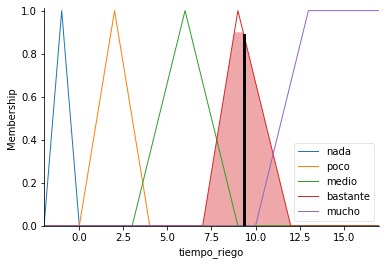

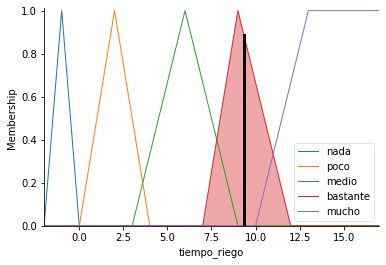

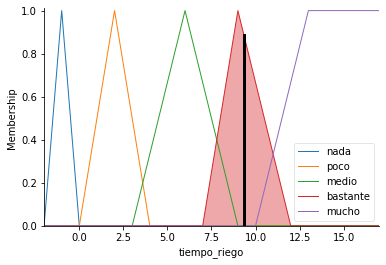

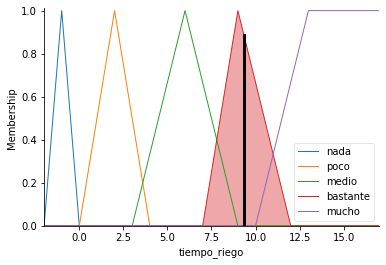

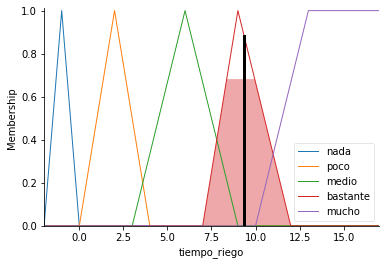

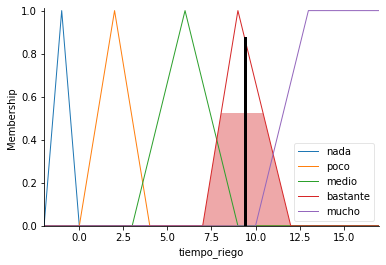

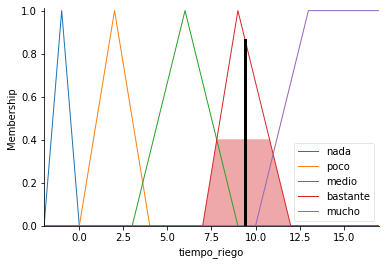

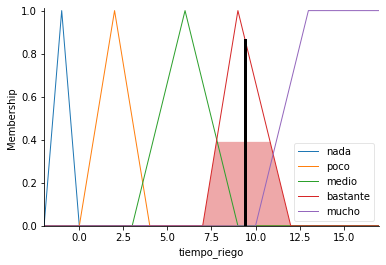

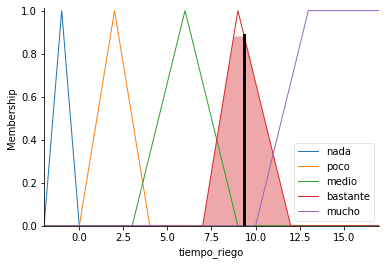

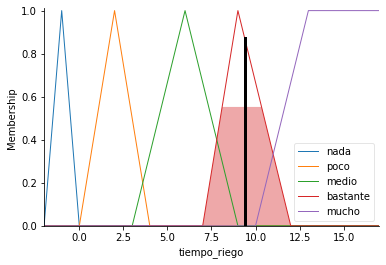

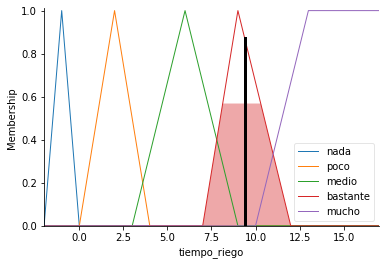

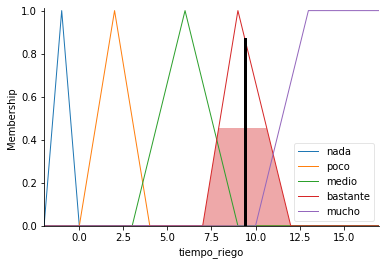

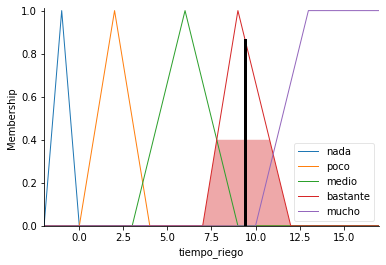

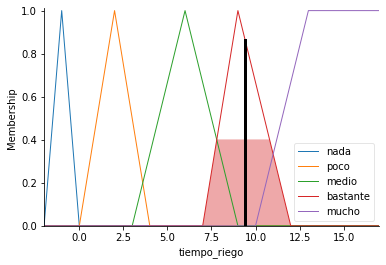

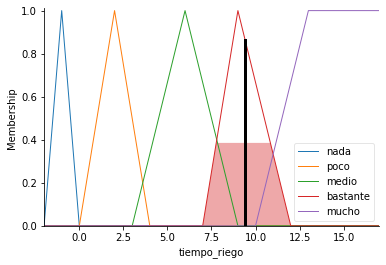

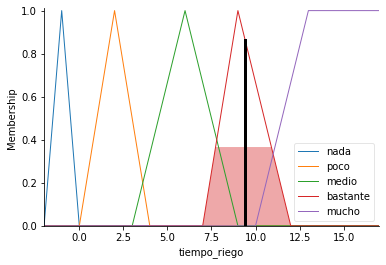

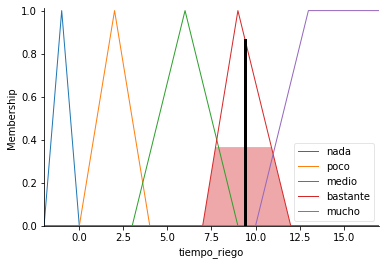

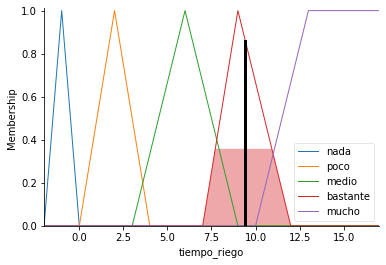

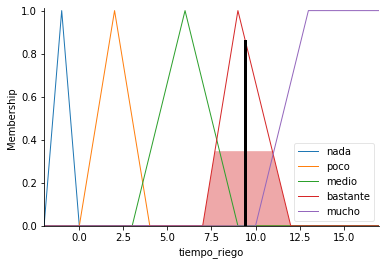

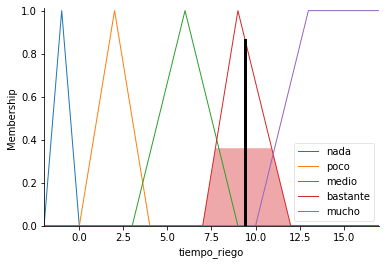

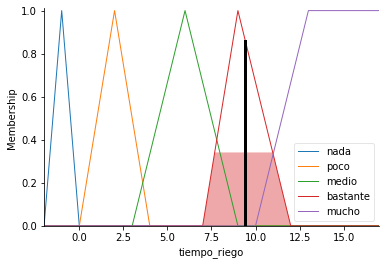

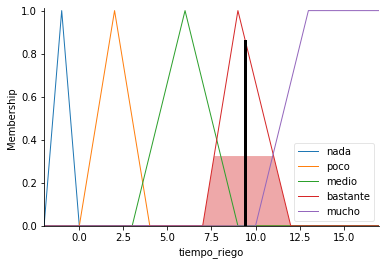

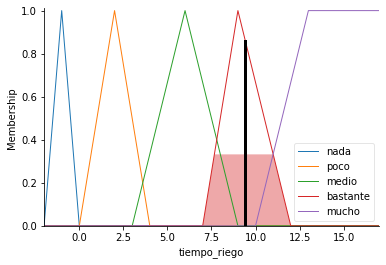

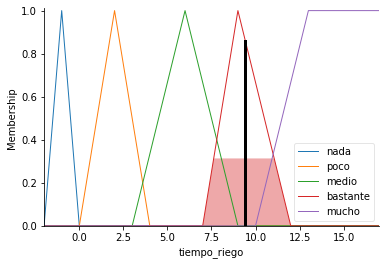

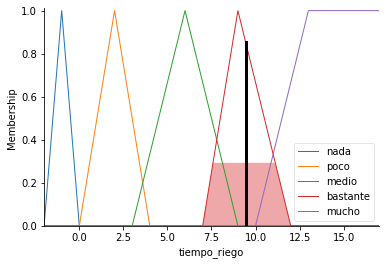

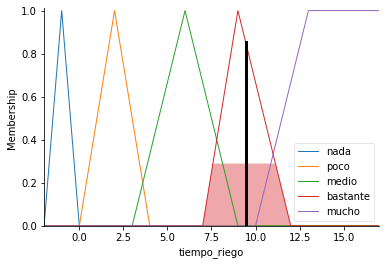

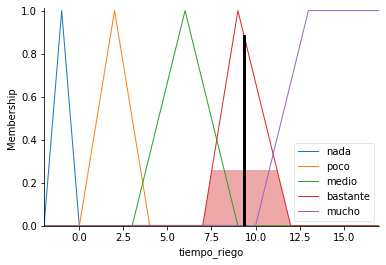

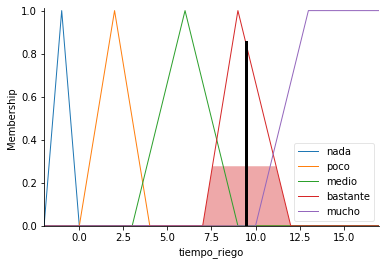

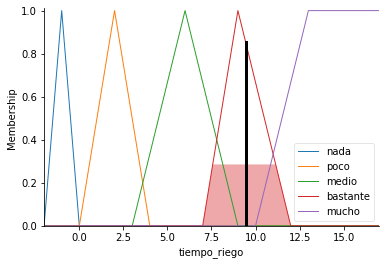

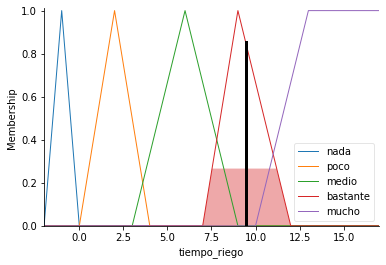

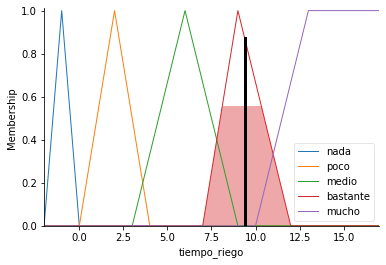

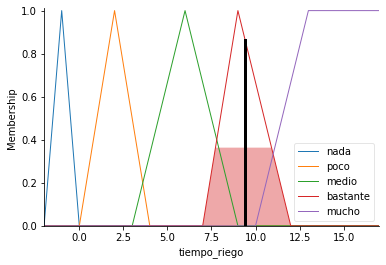

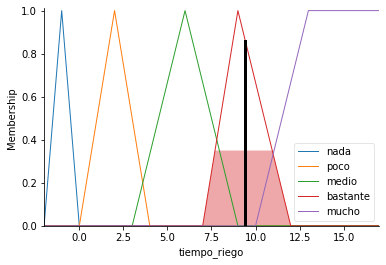

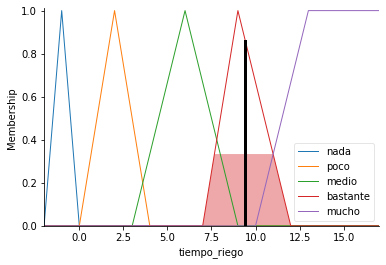

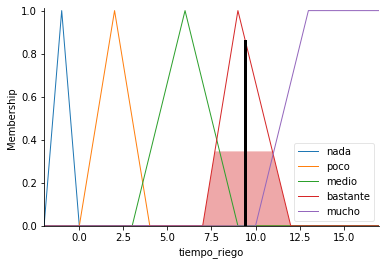

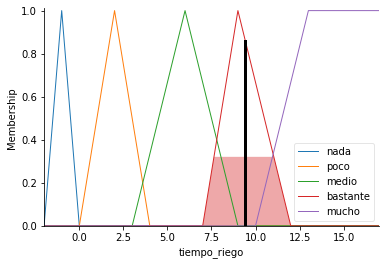

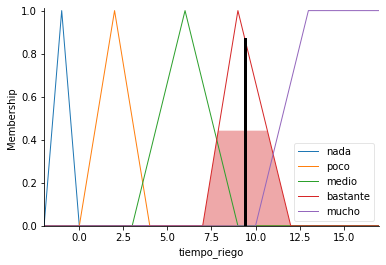

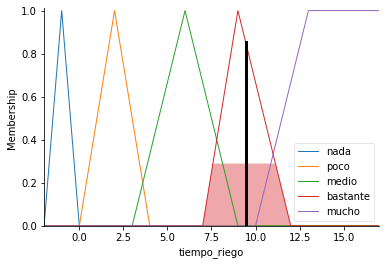

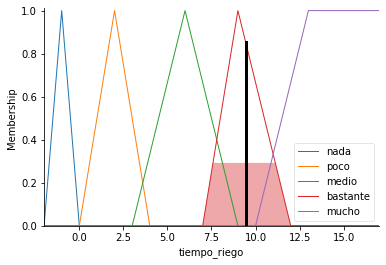

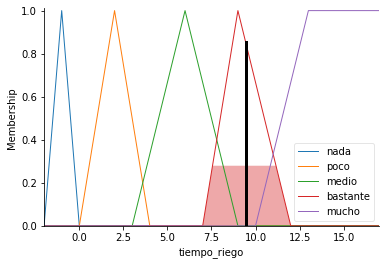

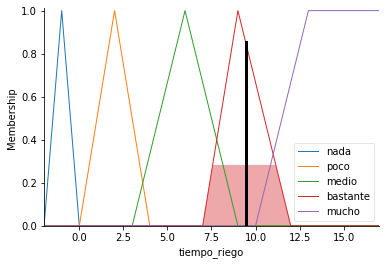

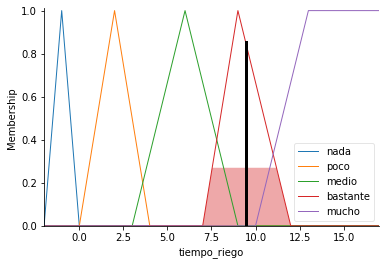

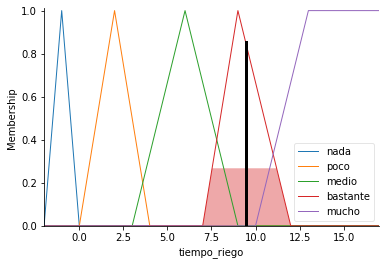

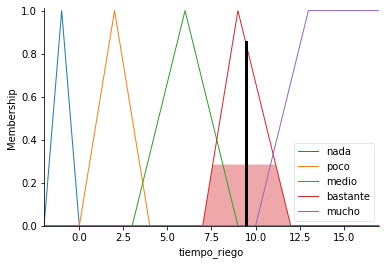

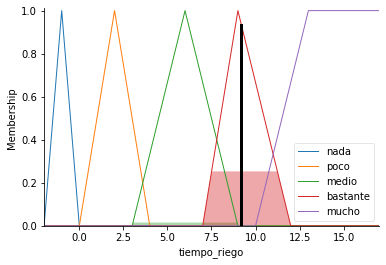

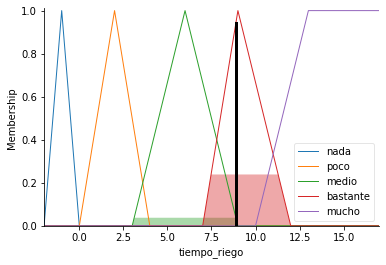

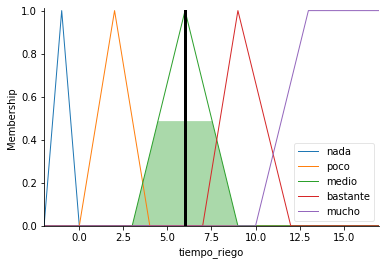

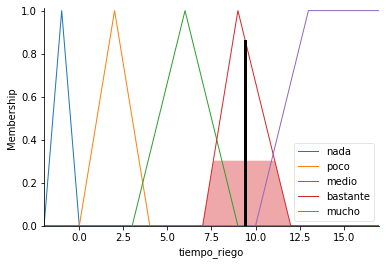

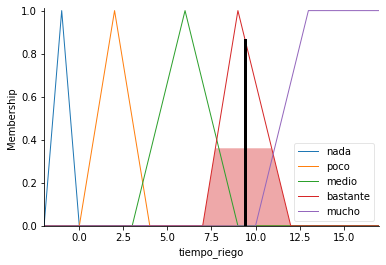

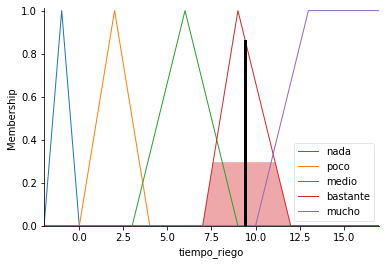

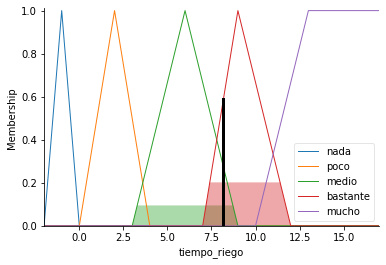

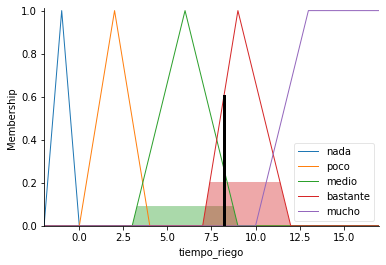

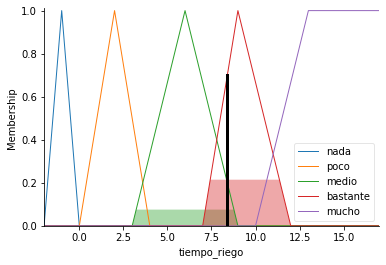

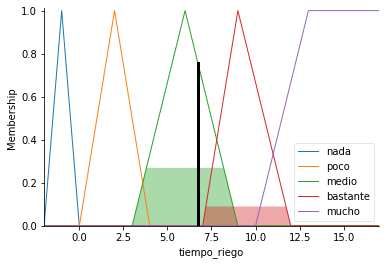

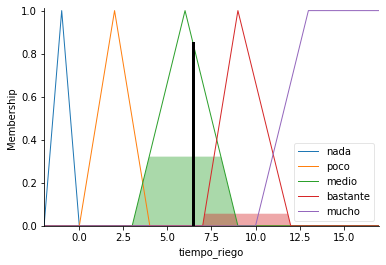

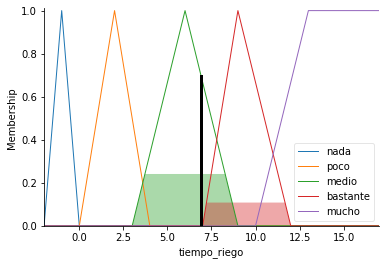

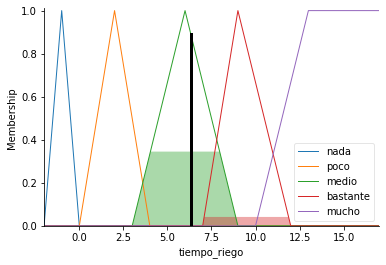

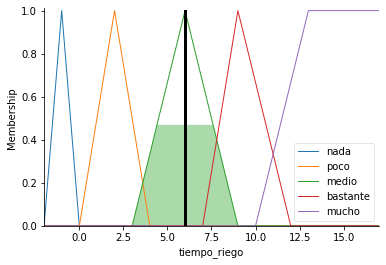

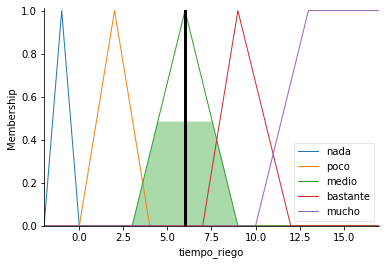

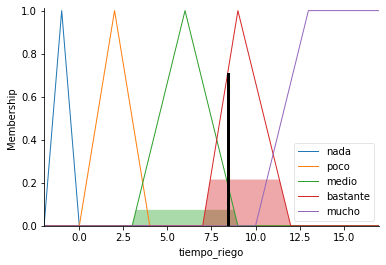

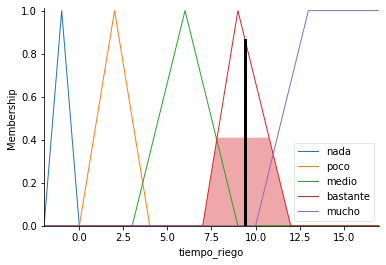

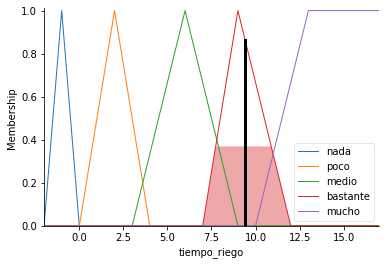

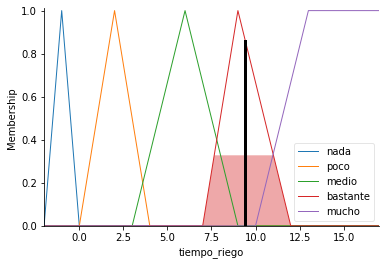

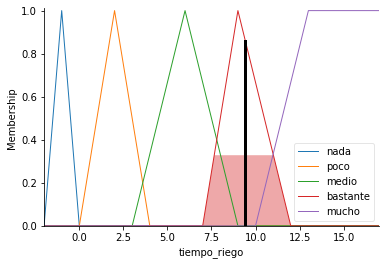

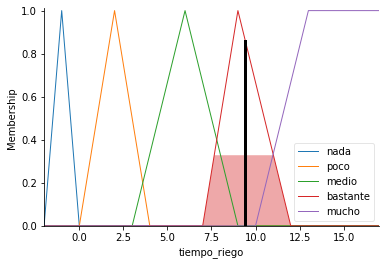

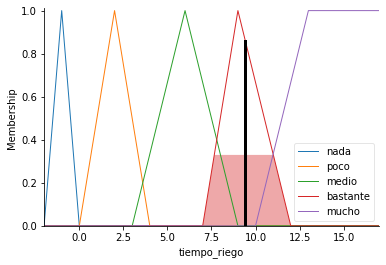

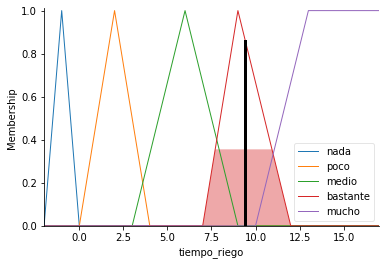

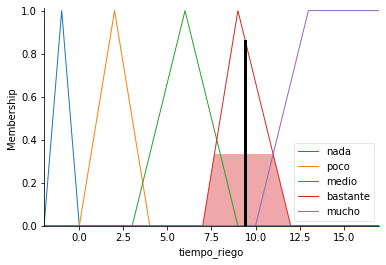

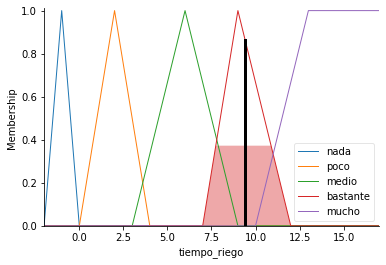

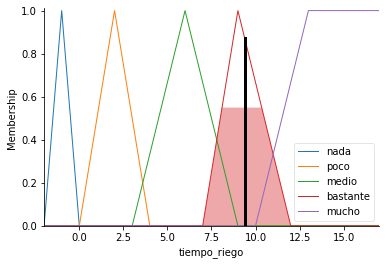

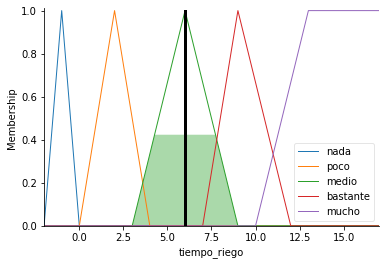

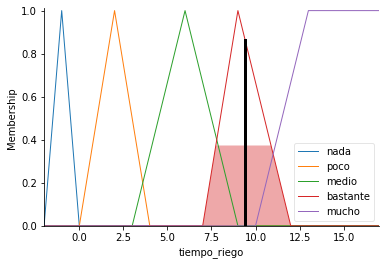

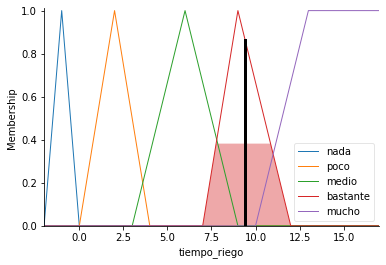

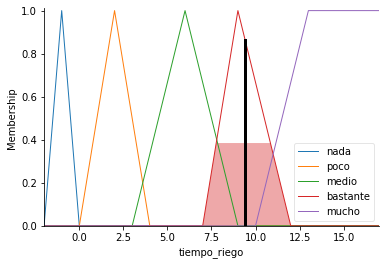

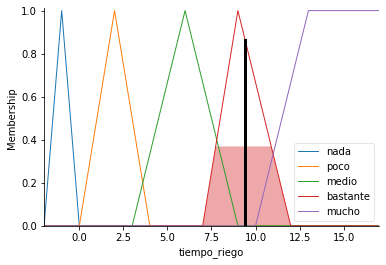

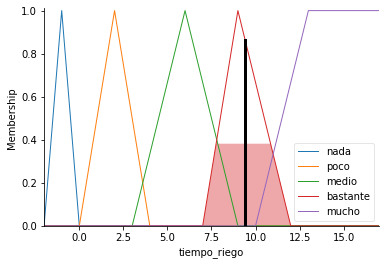

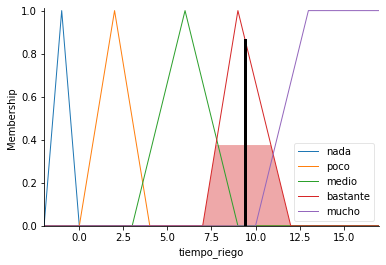

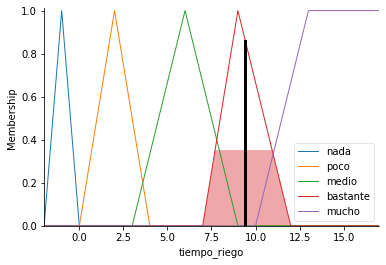

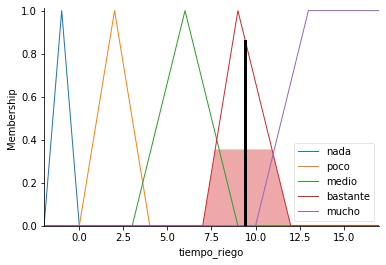

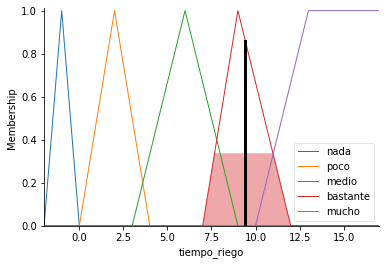

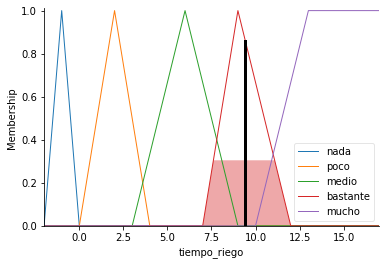

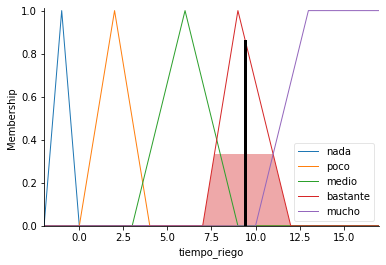

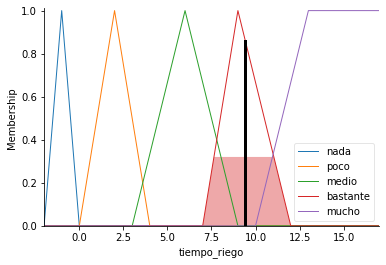

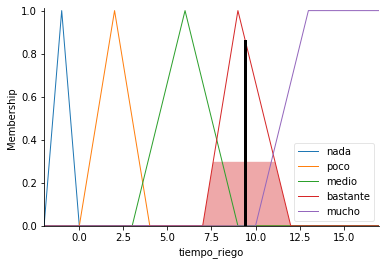

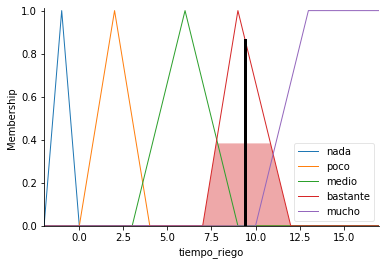

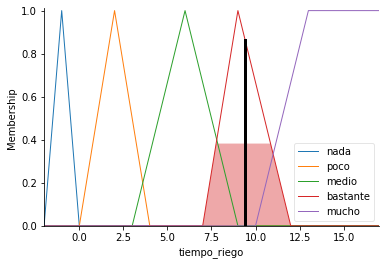

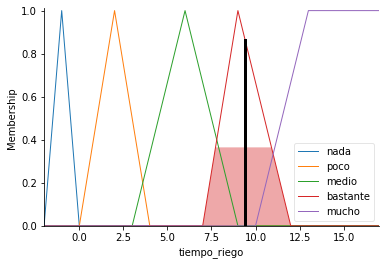

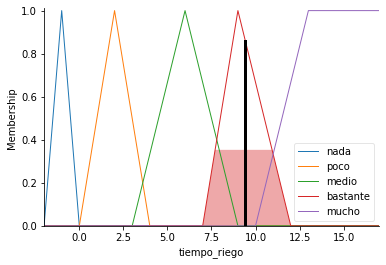

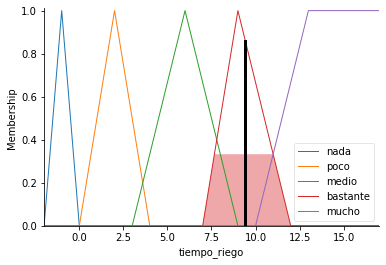

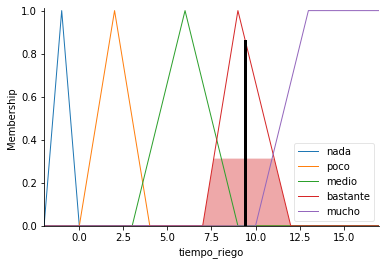

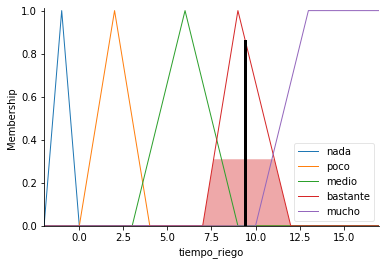

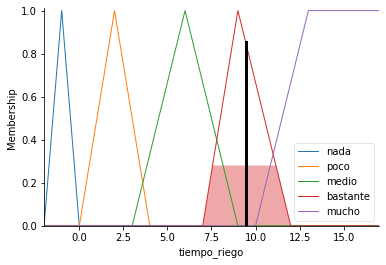

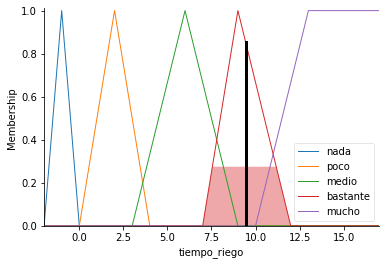

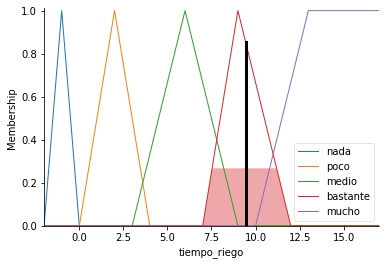

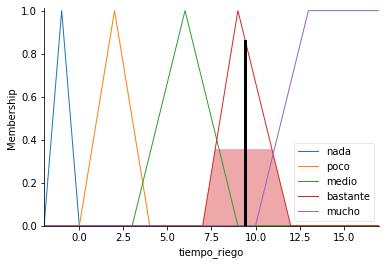

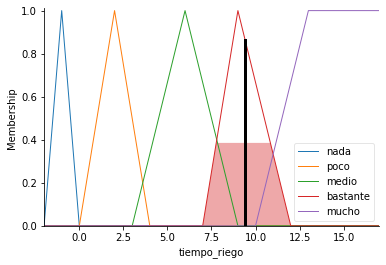

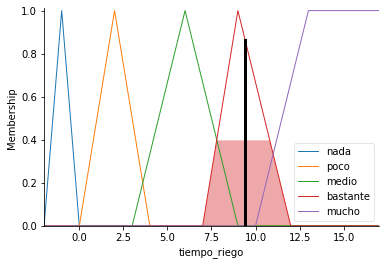

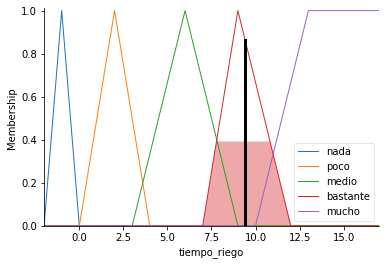

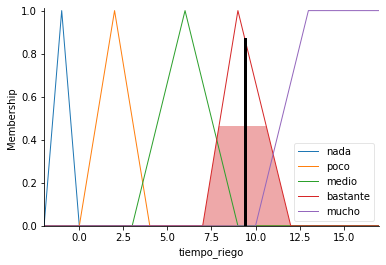

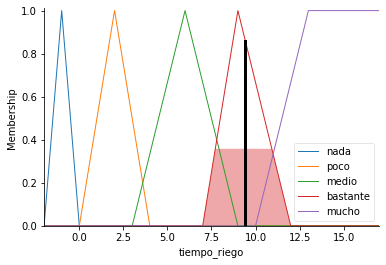

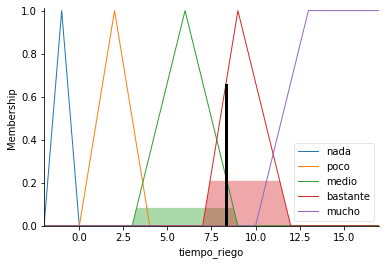

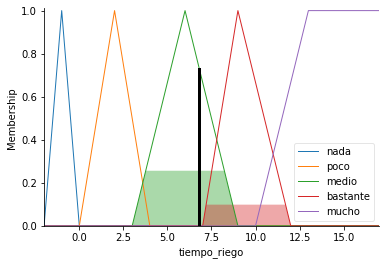

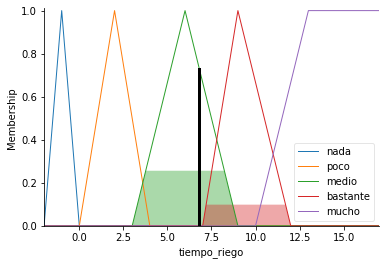

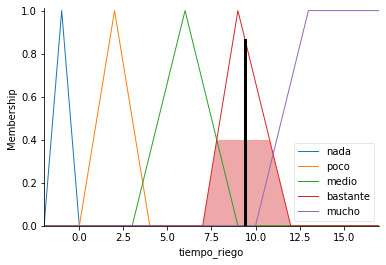

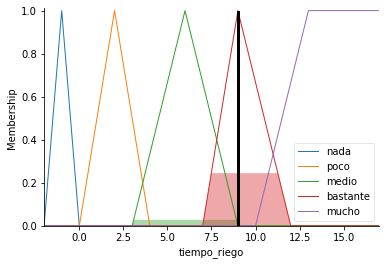

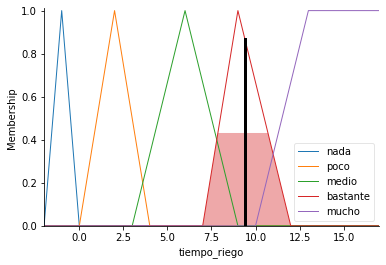

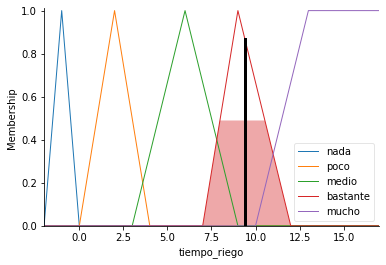

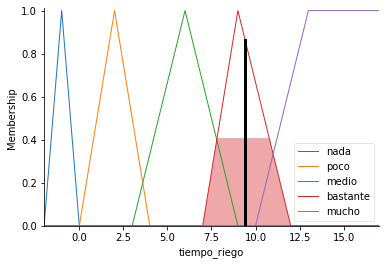

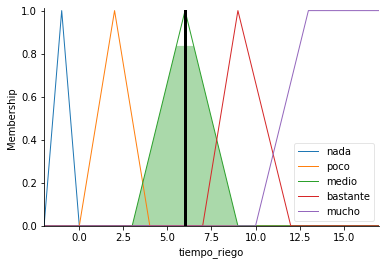

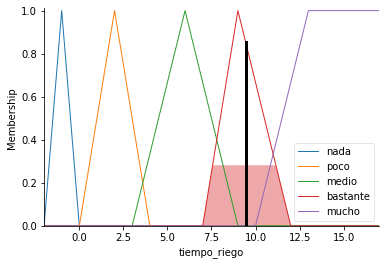

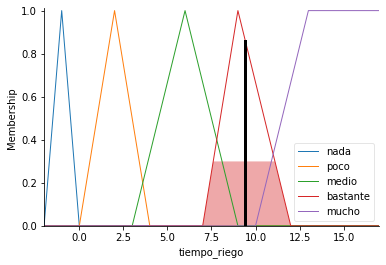

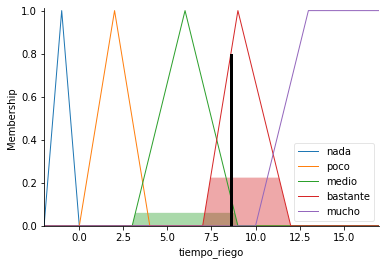

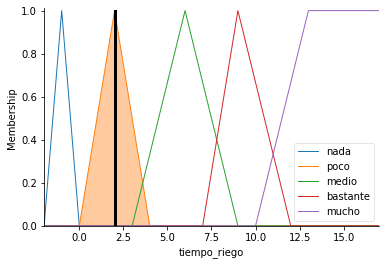

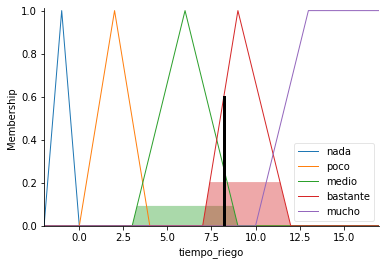

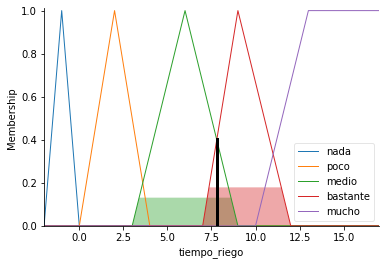

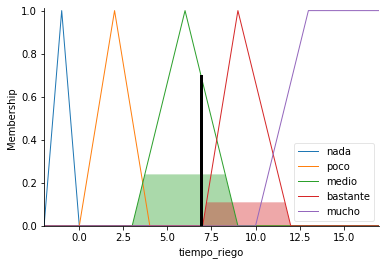

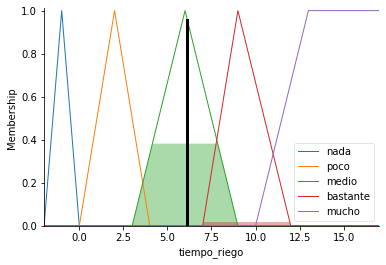

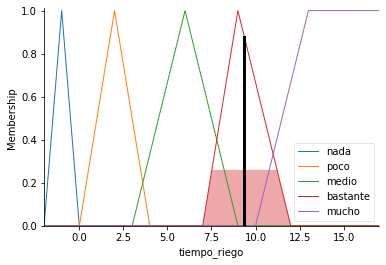

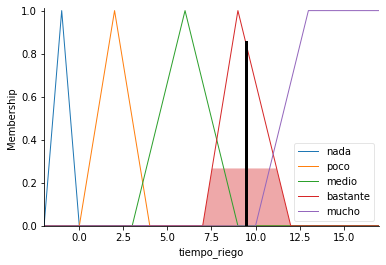

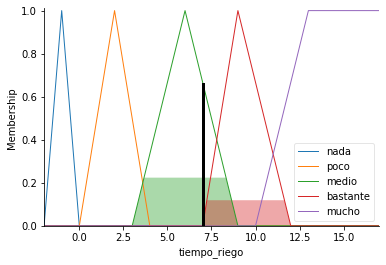

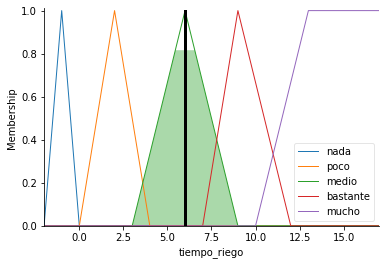

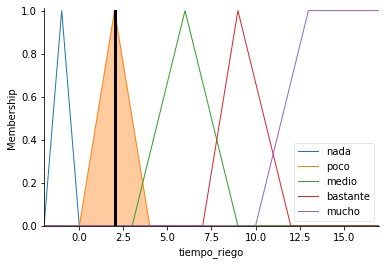

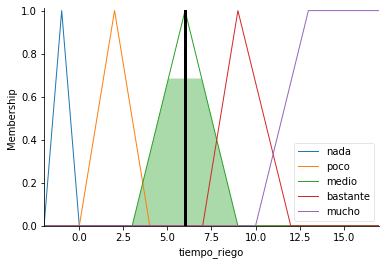

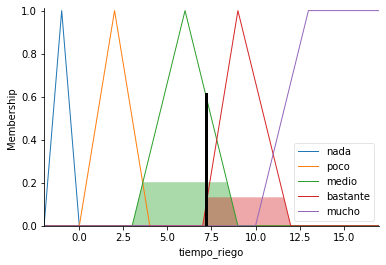

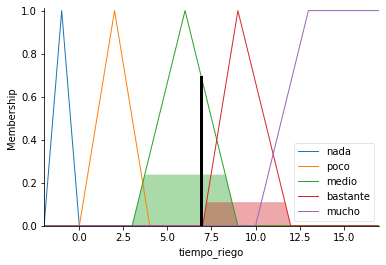

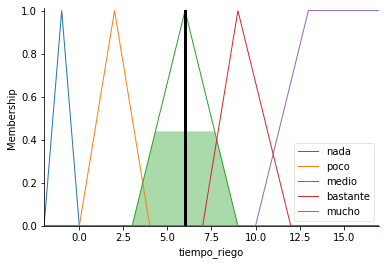

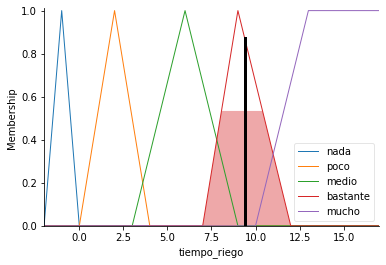

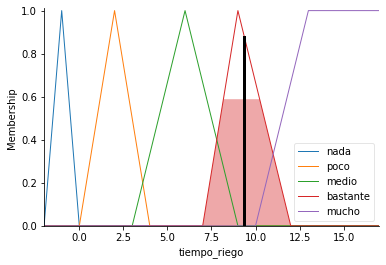

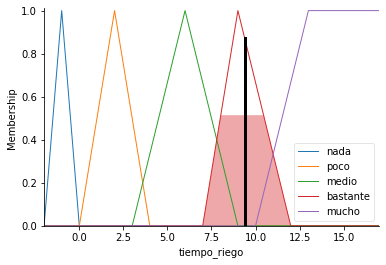

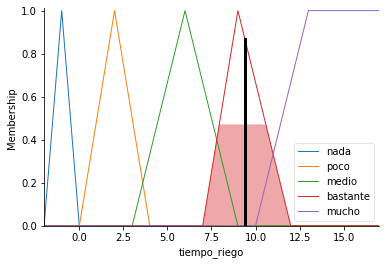

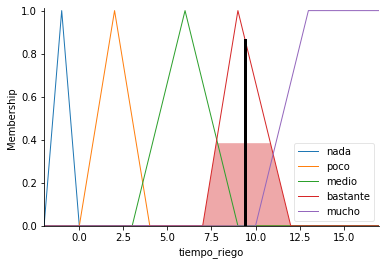

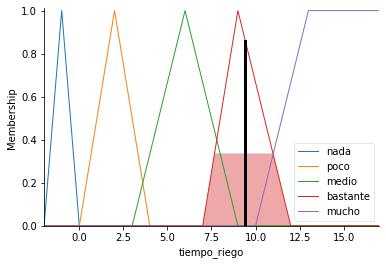

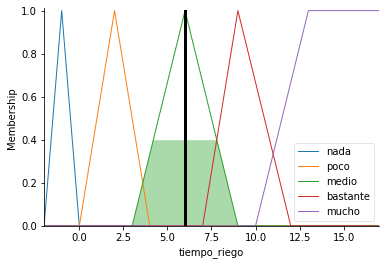

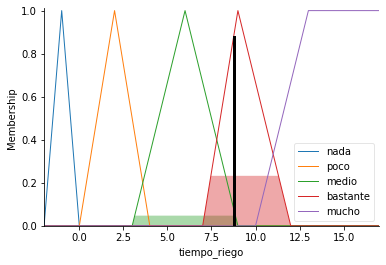

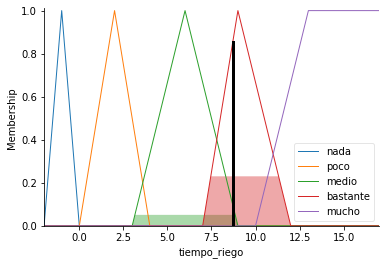

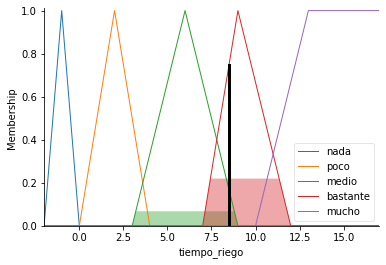

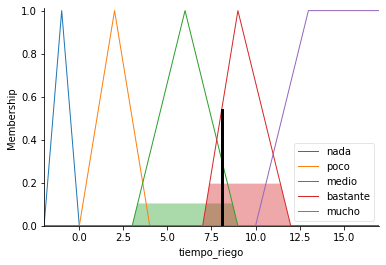

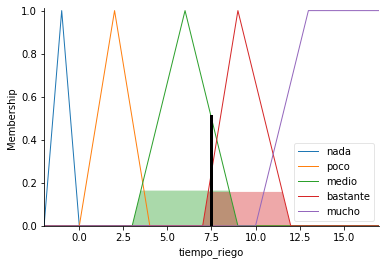

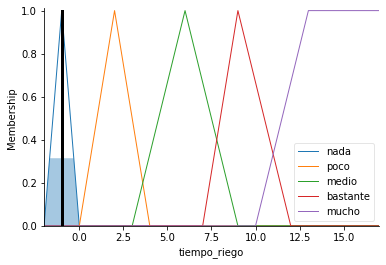

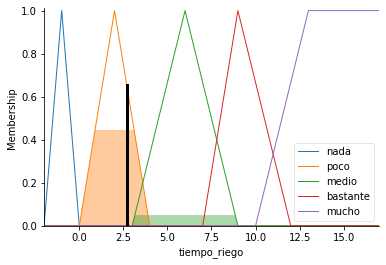

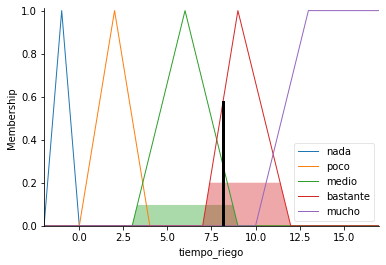

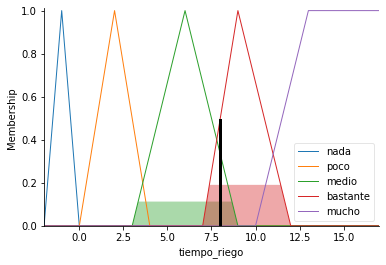

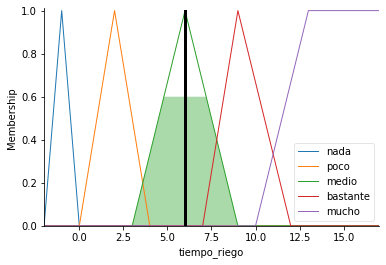

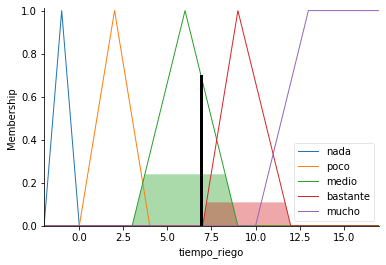

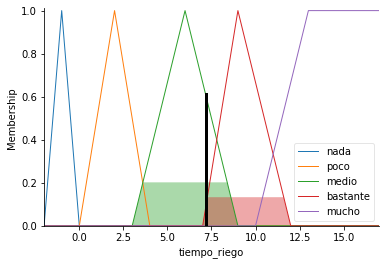

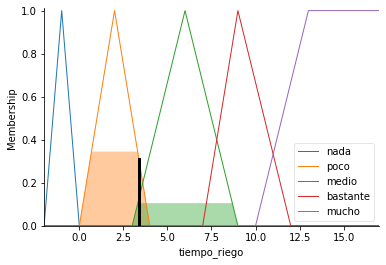

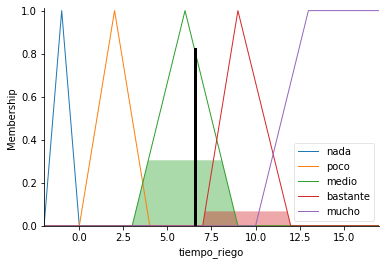

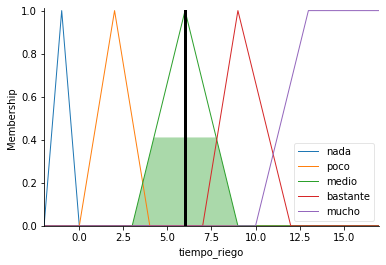

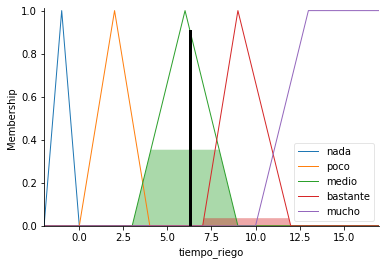

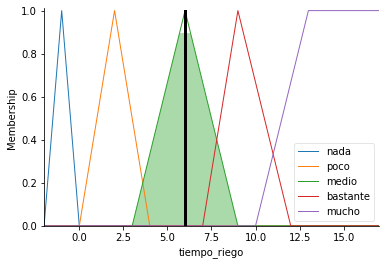

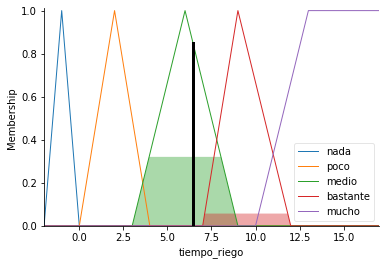

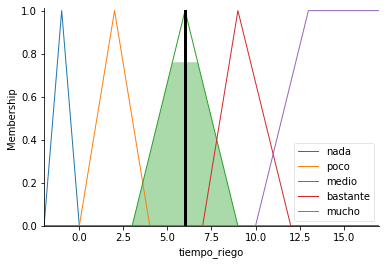

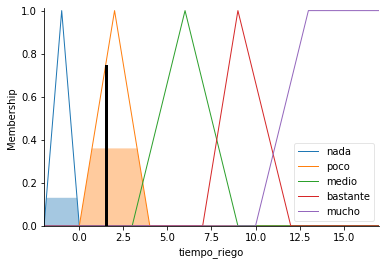

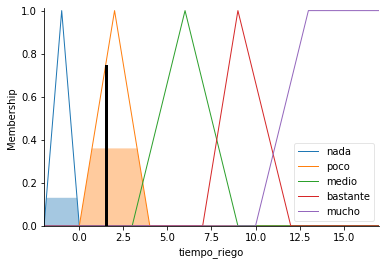

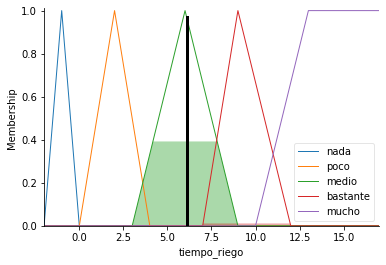

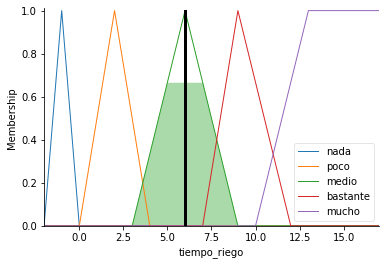

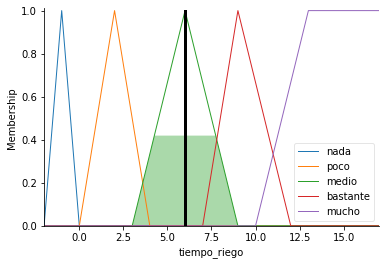

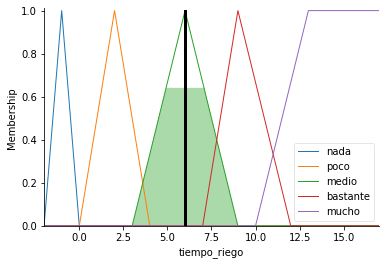

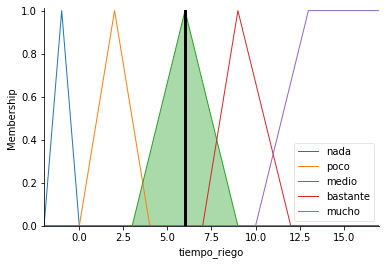

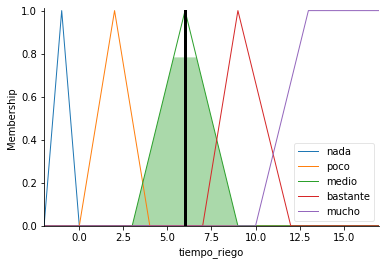

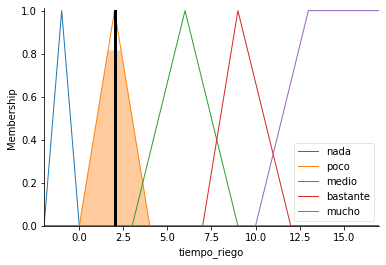

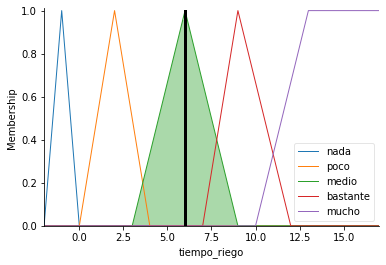

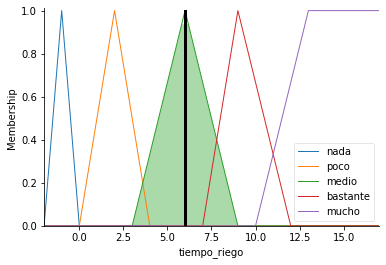

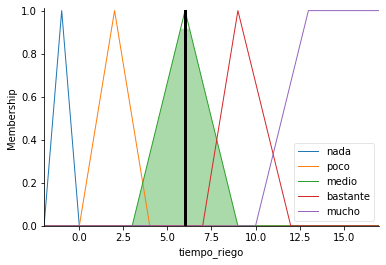

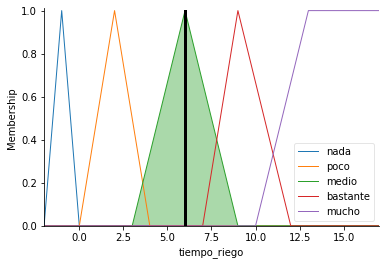

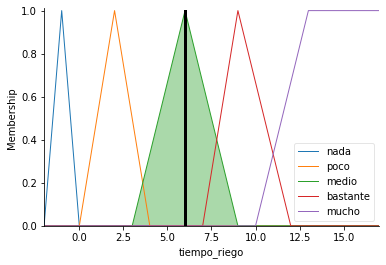

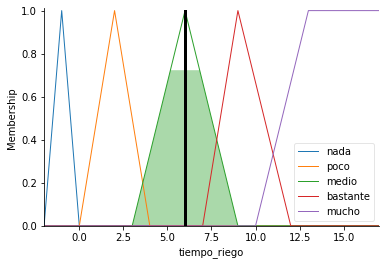

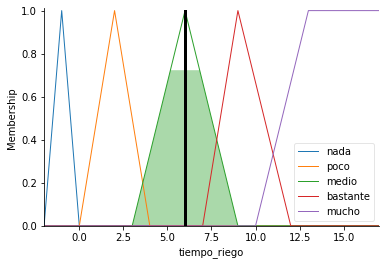

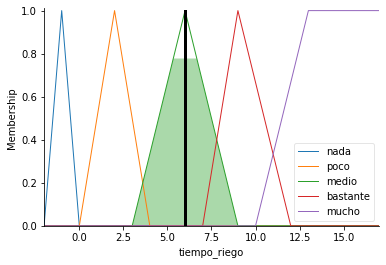

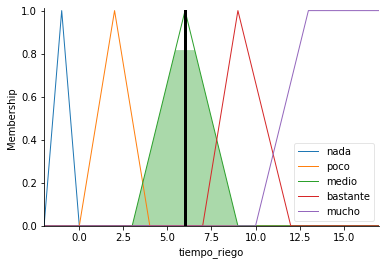

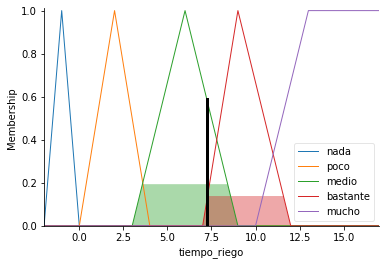

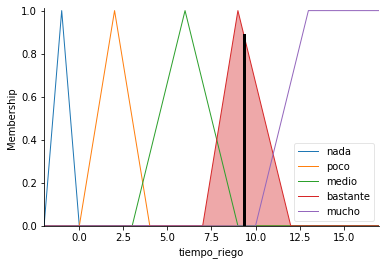

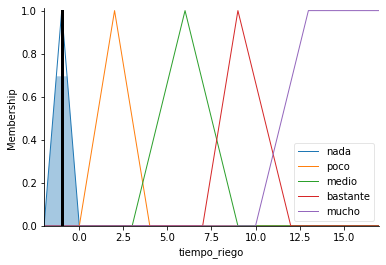

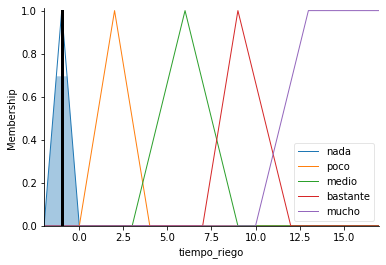

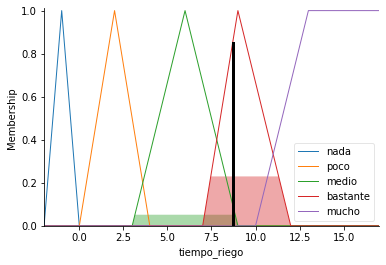

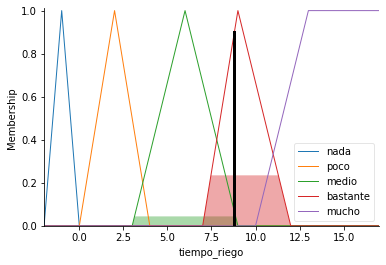

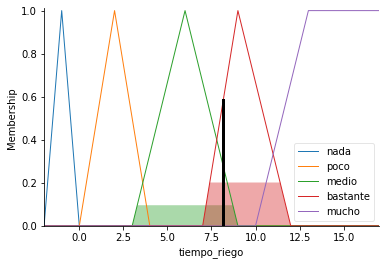

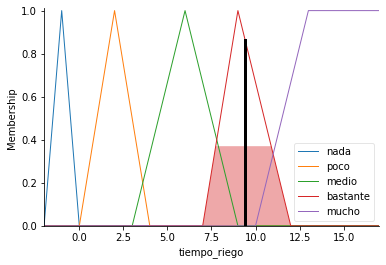

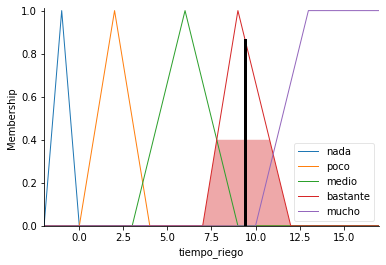

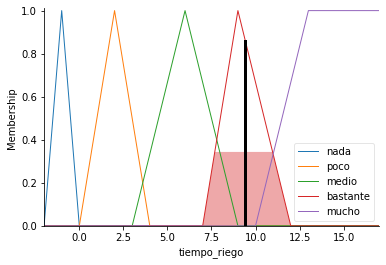

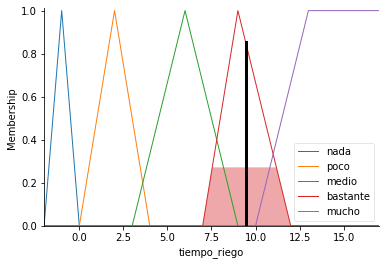

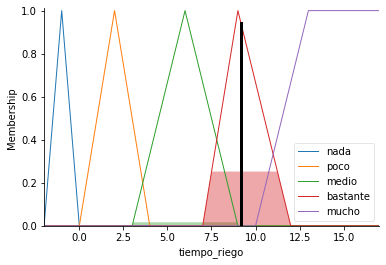

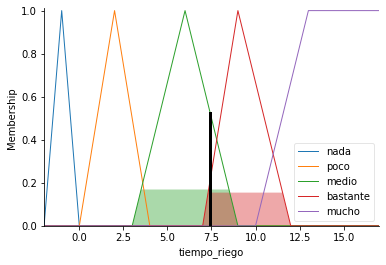

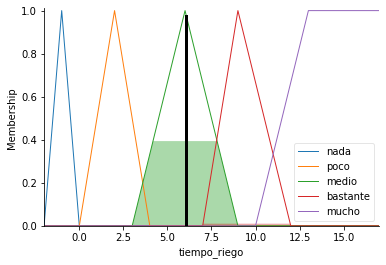

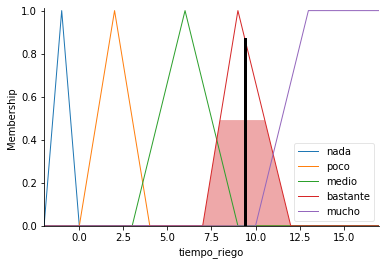

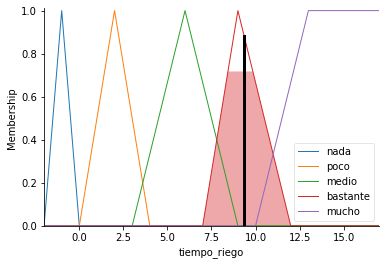

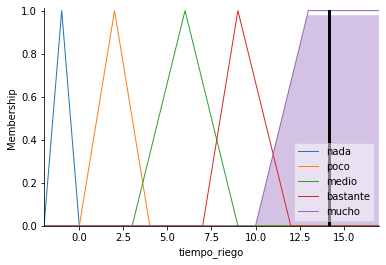

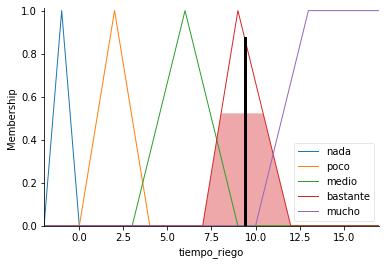

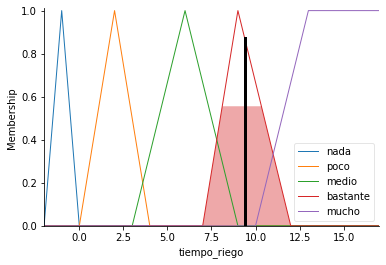

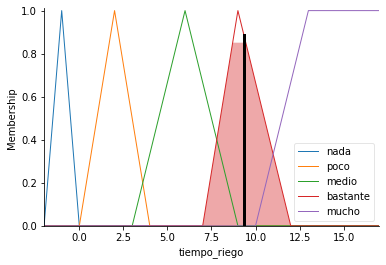

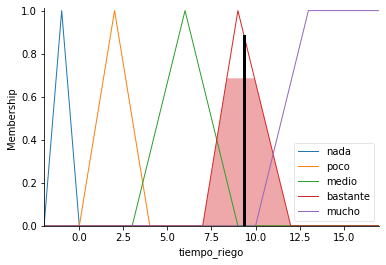

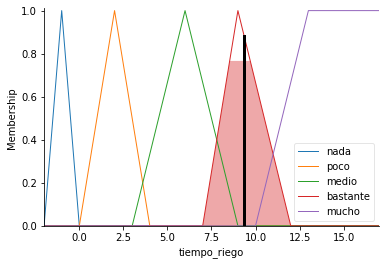

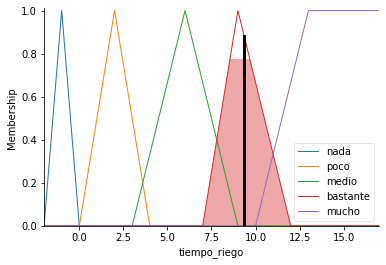

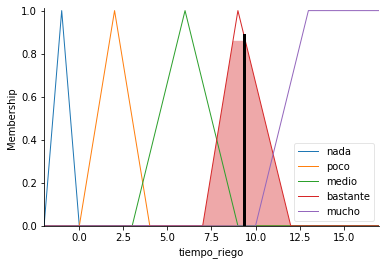

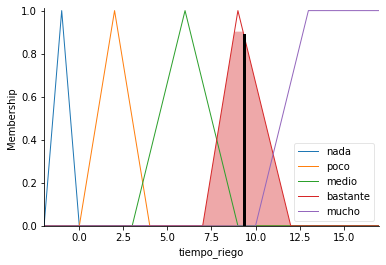

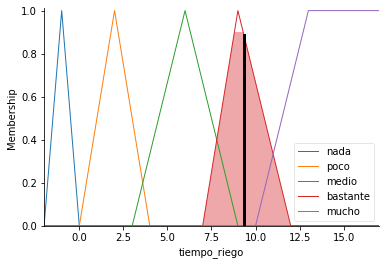

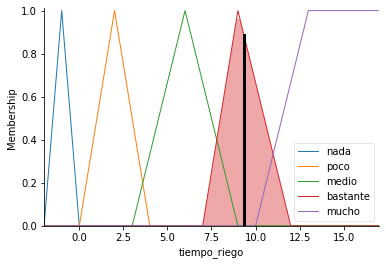

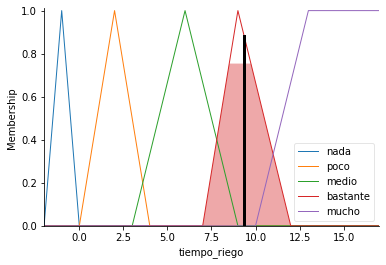

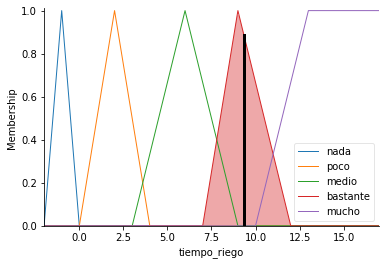

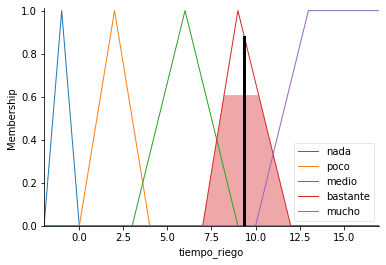

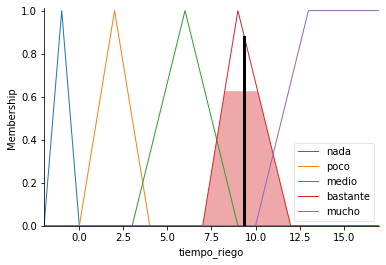

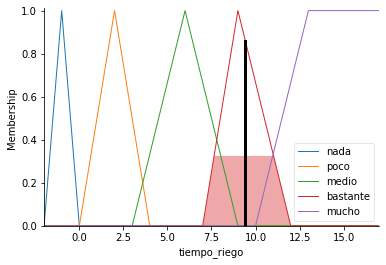

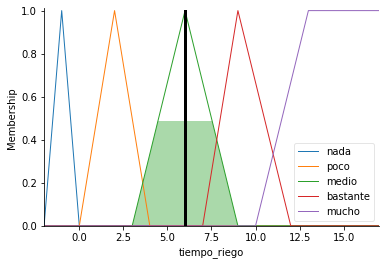

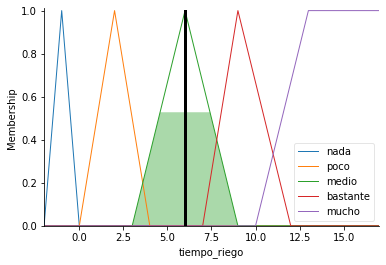

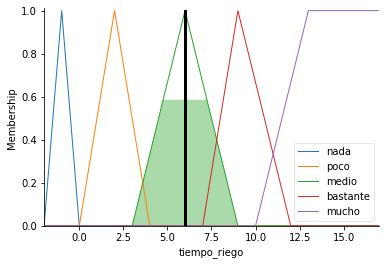

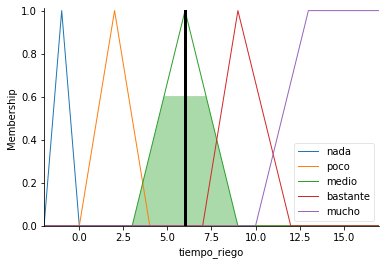

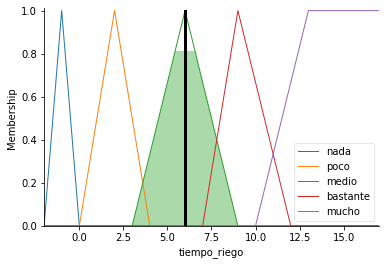

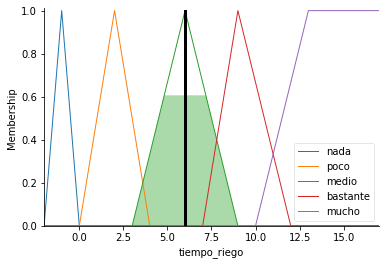

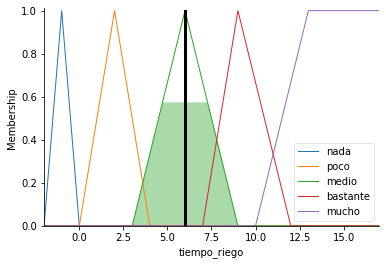

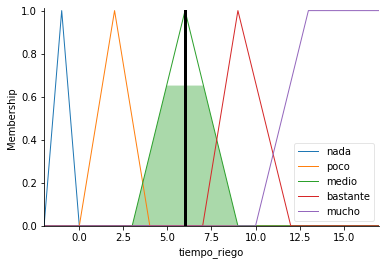

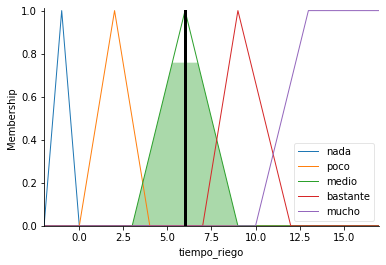

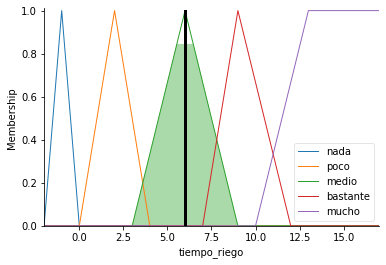

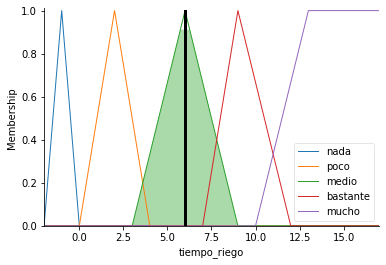

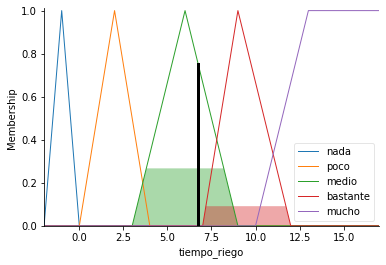

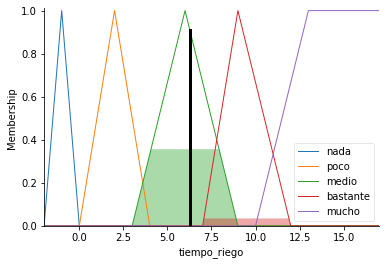

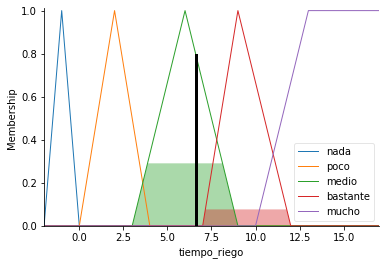

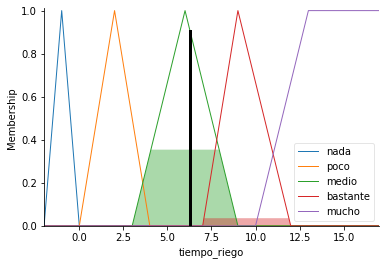

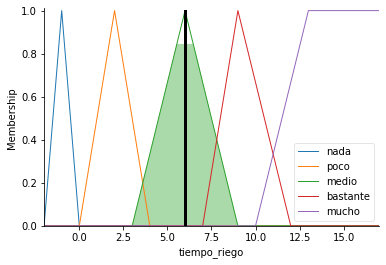

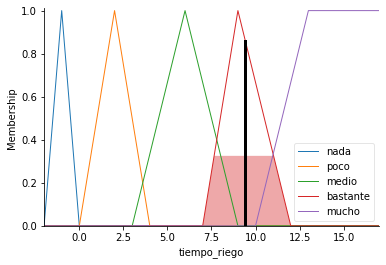

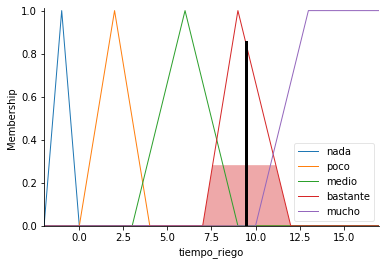

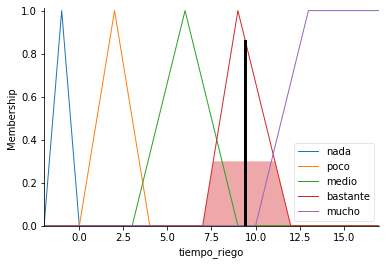

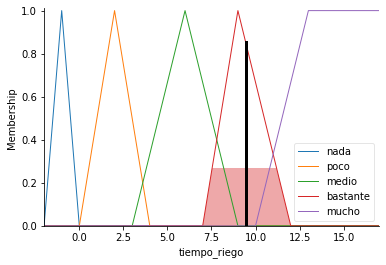

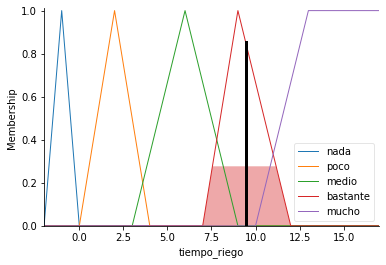

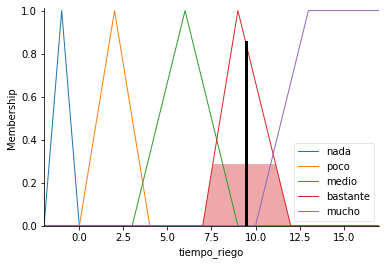

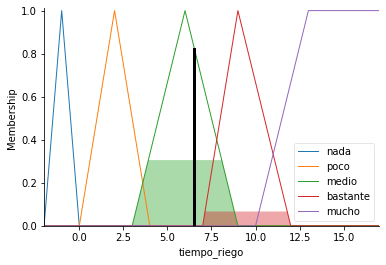

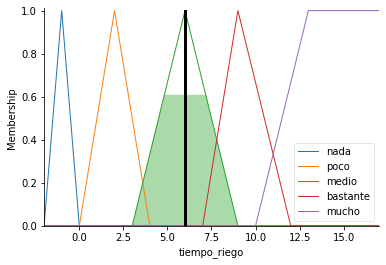

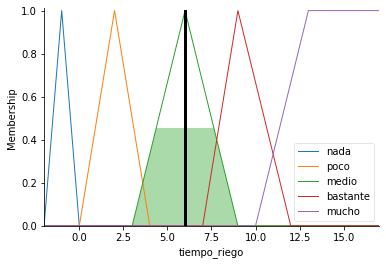

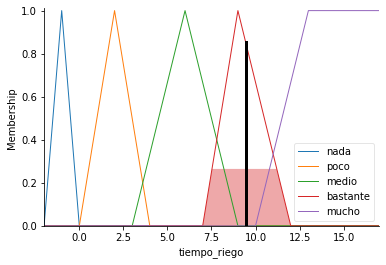

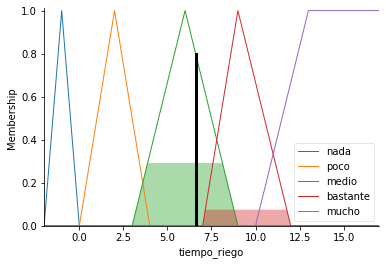

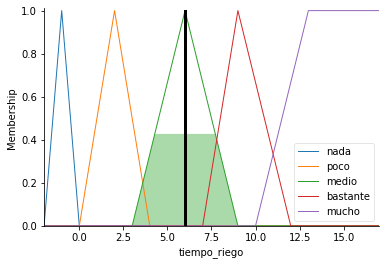

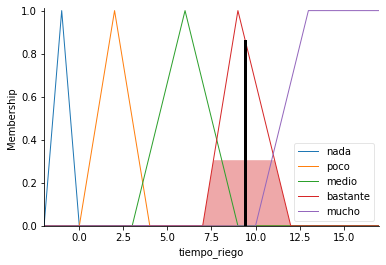

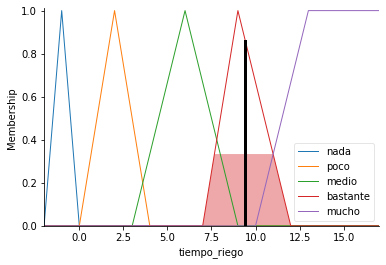

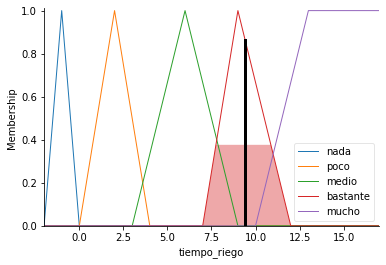

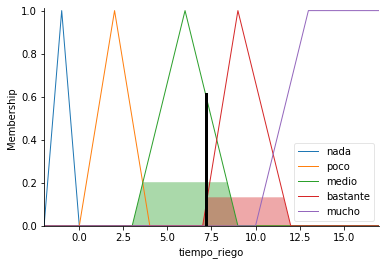

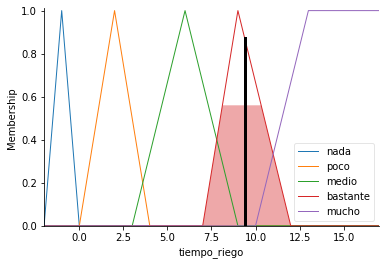

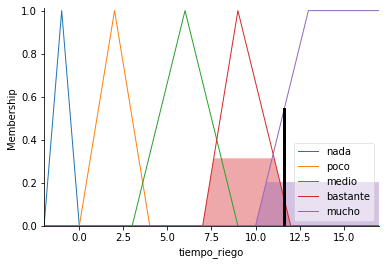

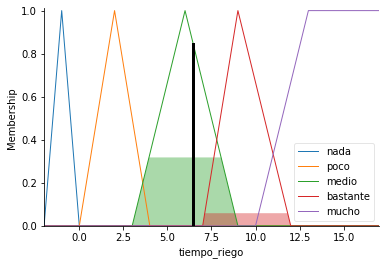

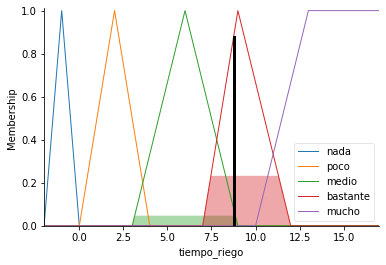

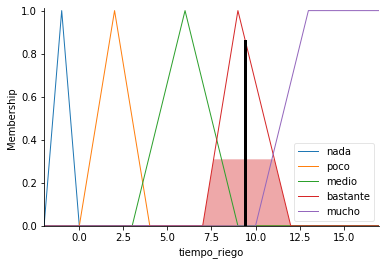

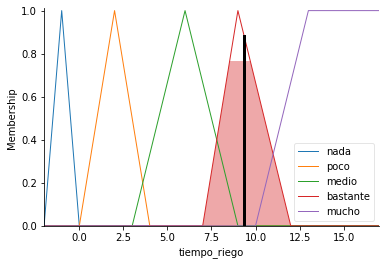

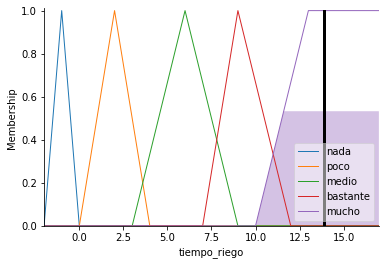

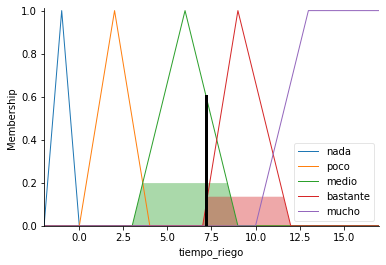

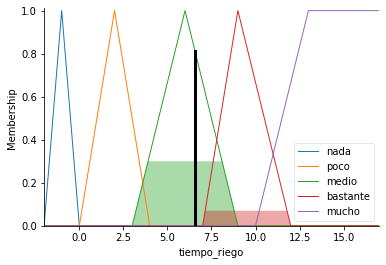

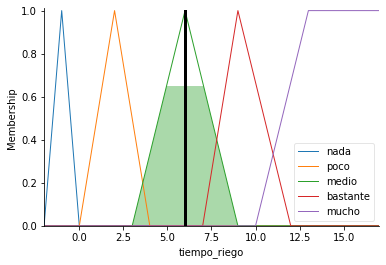

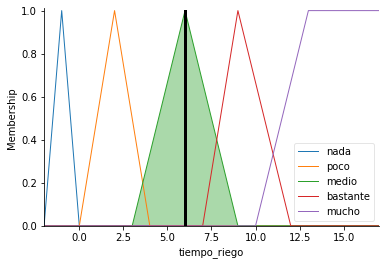

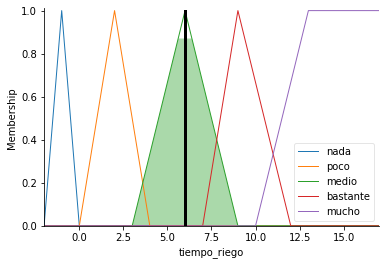

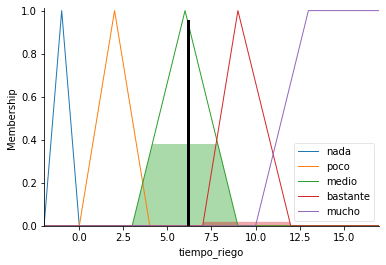

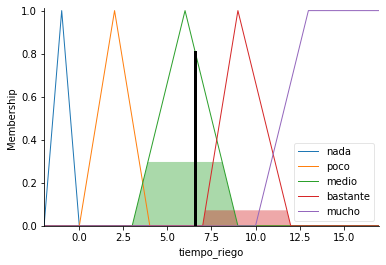

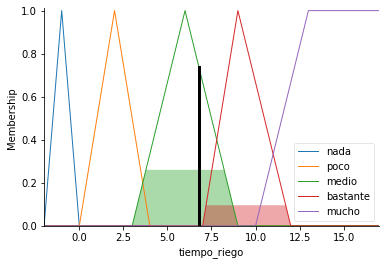

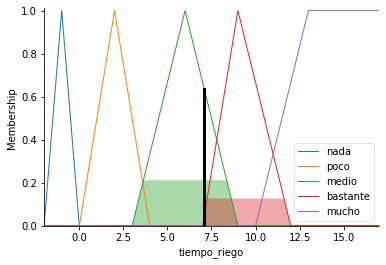

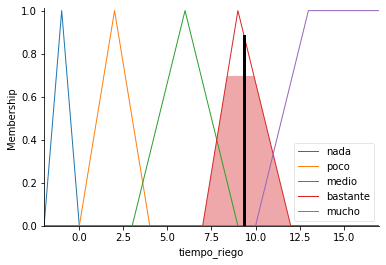

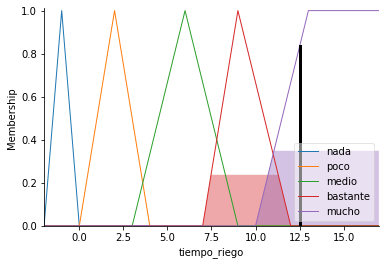

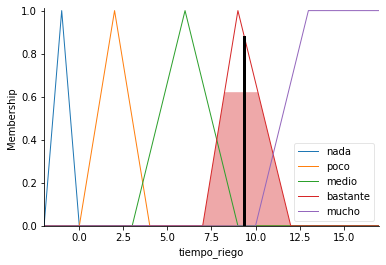

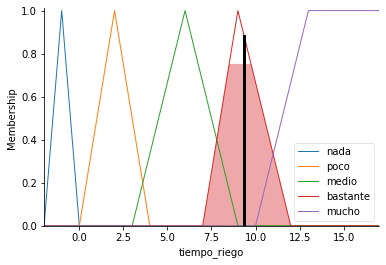

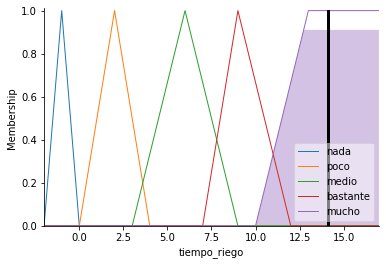

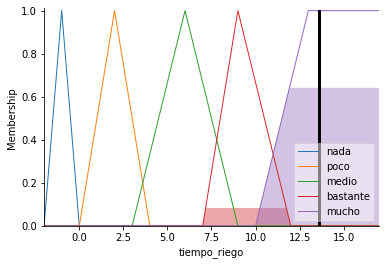

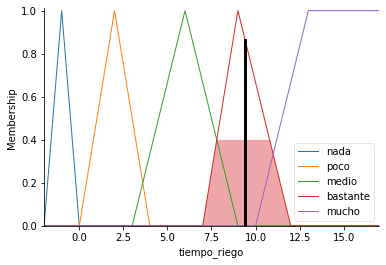

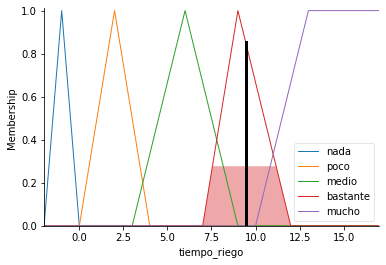

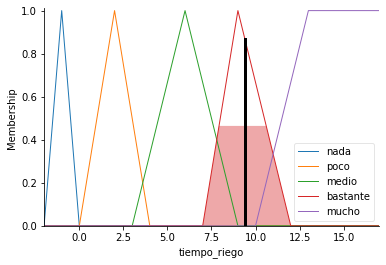

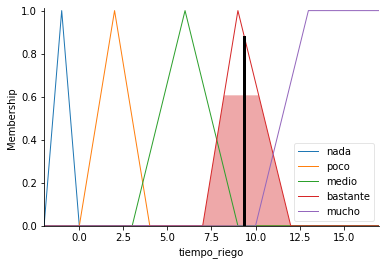

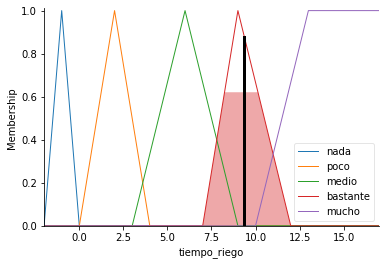

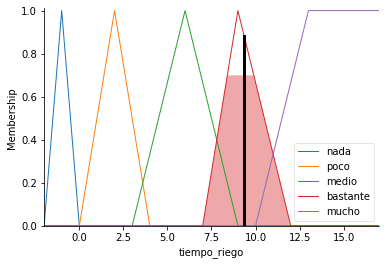

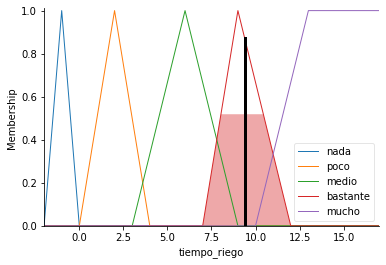

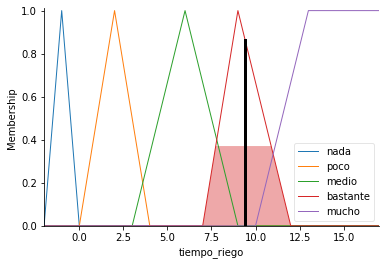

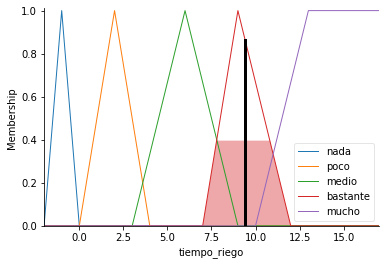

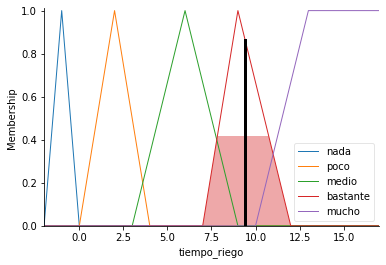

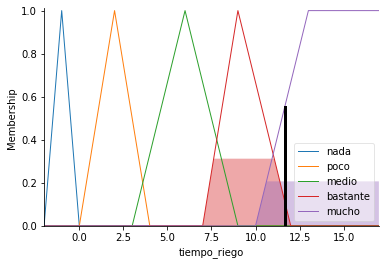

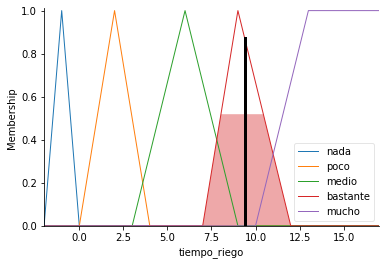

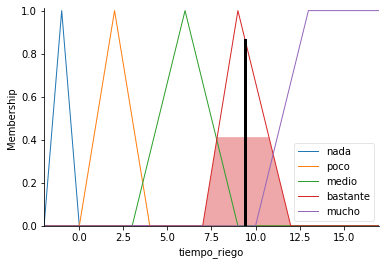

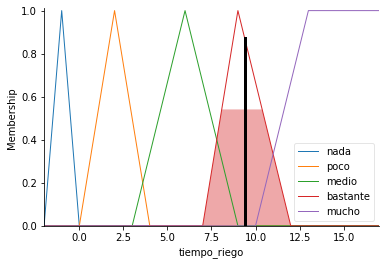

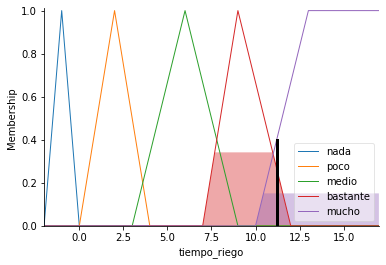

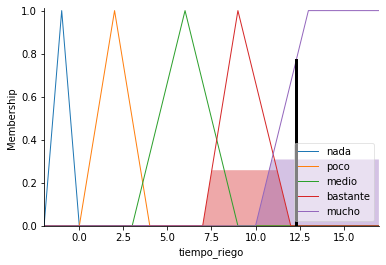

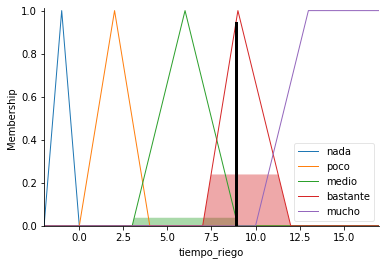

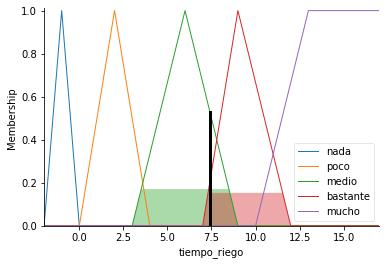

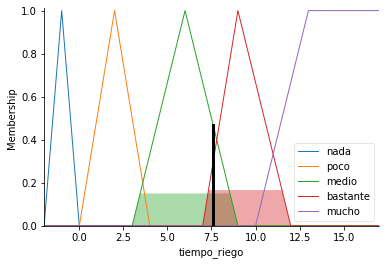

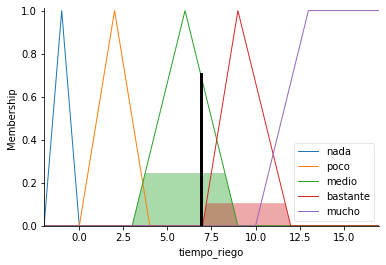

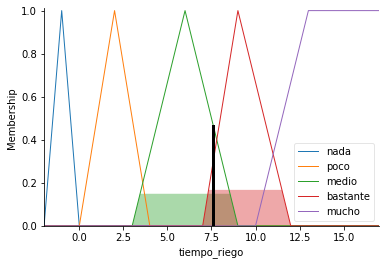

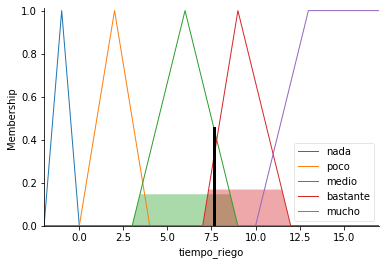

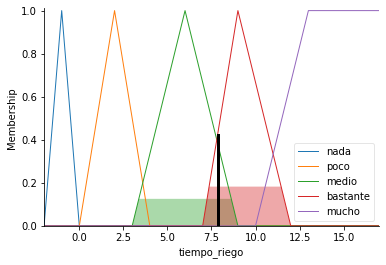

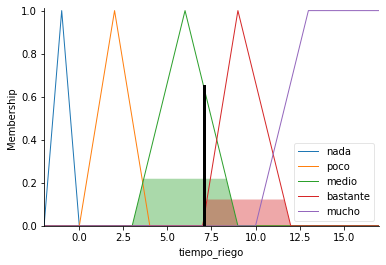

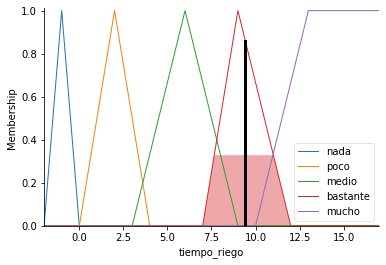

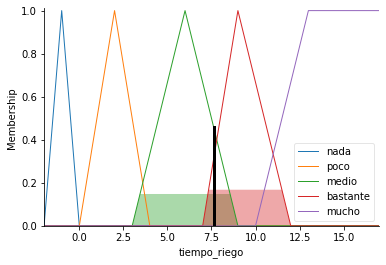

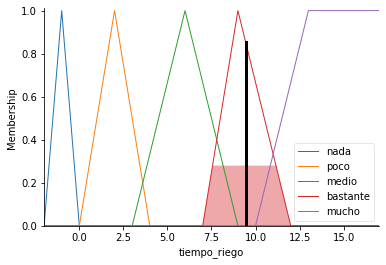

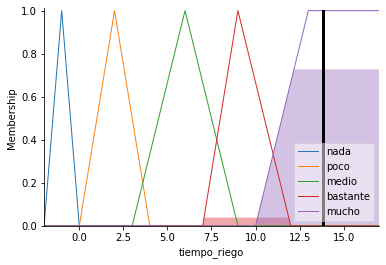

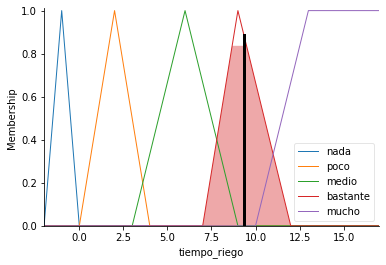

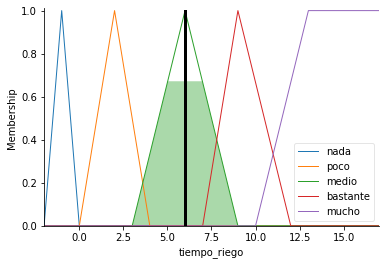

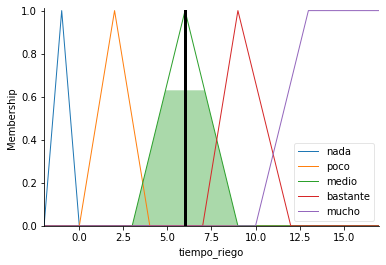

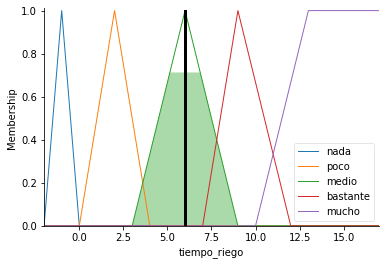

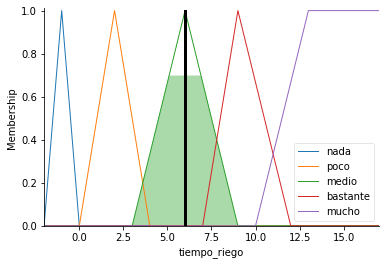

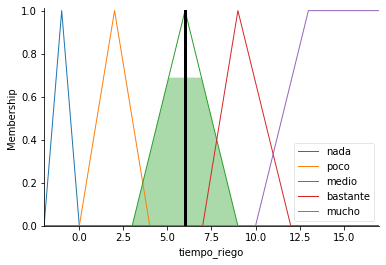

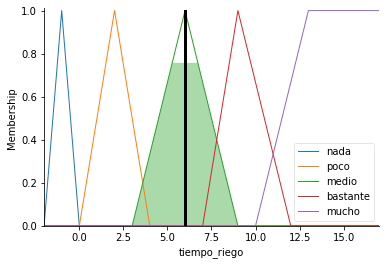

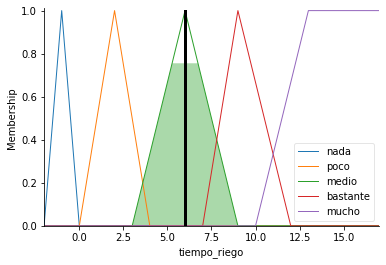

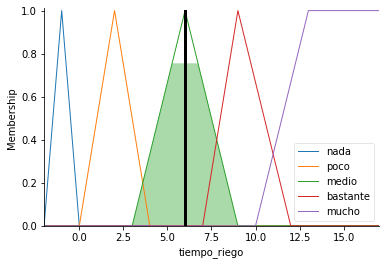

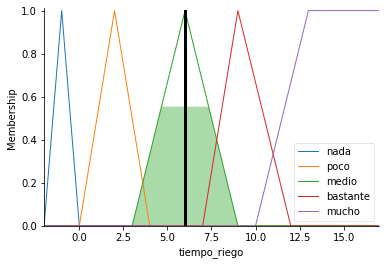

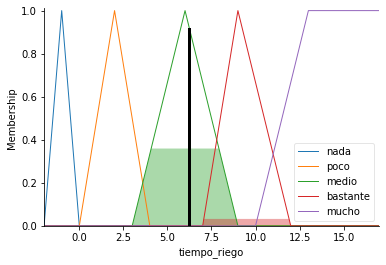

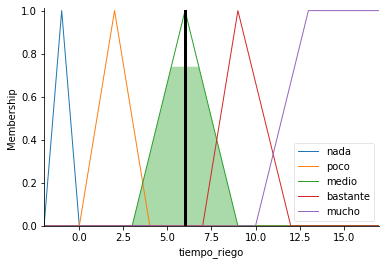

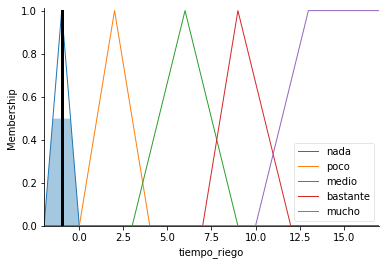

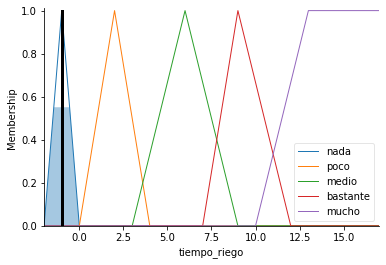

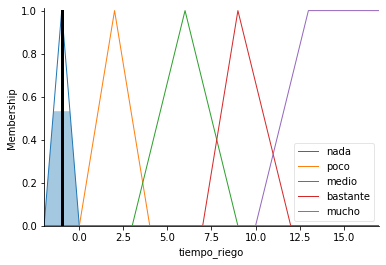

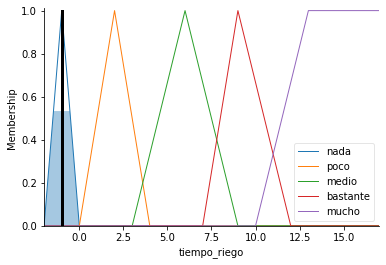

In [10]:
historial = HistorialRiego.objects.filter(codigo_sensor = 5)
for h in historial:
    
    try:
        tipping.input['humedad_suelo'] = float(h.valor_humed_suelo)
        tipping.compute()
        print("Fecha de Registro: ", h.fecha_riego)
        print("Humedad de Suelo: ",h.valor_humed_suelo, "Tiempo de Riego: ", tipping.output['tiempo_riego'])
        tiempo_riego.view(sim=tipping)
        
    except:
        pass
    